# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
Wine = fetch_ucirepo(id=109)
Hd = fetch_ucirepo(id=80)

# FOR WINE **DATASET**

In [ ]:
from sklearn.datasets import load_wine
wine_bunch = load_wine()

X = pd.DataFrame(wine_bunch.data, columns=wine_bunch.feature_names)
Y = pd.Series(wine_bunch.target, name="class")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
# 1. scale
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train)
X_test_scaled_wine  = scaler.transform(X_test)

# APPLYING PCA

In [ ]:
X_train_pca_wine

array([[ 1.47234303e+00,  7.34250716e-01,  4.54891817e-01,
        -1.03594755e+00,  5.49675792e-01, -7.21625991e-01,
         9.66454346e-02],
       [ 2.64970940e+00,  1.23021145e+00,  1.50046210e+00,
        -7.48547675e-01, -1.08490377e-01,  4.52006554e-01,
        -4.29116764e-01],
       [ 1.88878827e+00,  7.92471604e-01, -9.91753532e-02,
        -1.00696033e+00, -7.72992340e-01, -6.27377972e-01,
        -2.51474653e-01],
       [ 2.21115907e+00,  7.53457676e-01, -7.92728229e-01,
        -1.18832038e+00, -5.89930132e-01, -2.58732272e-01,
        -1.27602239e-01],
       [-2.81757114e+00,  1.64568754e+00, -3.85180198e-01,
         1.45549667e-01, -5.62509609e-01,  5.63510470e-01,
        -4.38571791e-01],
       [-3.73165137e+00,  9.43745154e-01, -1.27412107e+00,
        -6.44866225e-01, -2.34790301e-01,  7.24077255e-01,
        -1.01934406e+00],
       [ 2.00318459e+00, -1.48866684e+00, -1.46729734e+00,
         1.89916623e+00,  3.88604427e+00,  4.77036158e-01,
         9.2707220

# SVC linear

-------------------------------------------------------
Performance Evaluation:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

-------------------------------------------------------


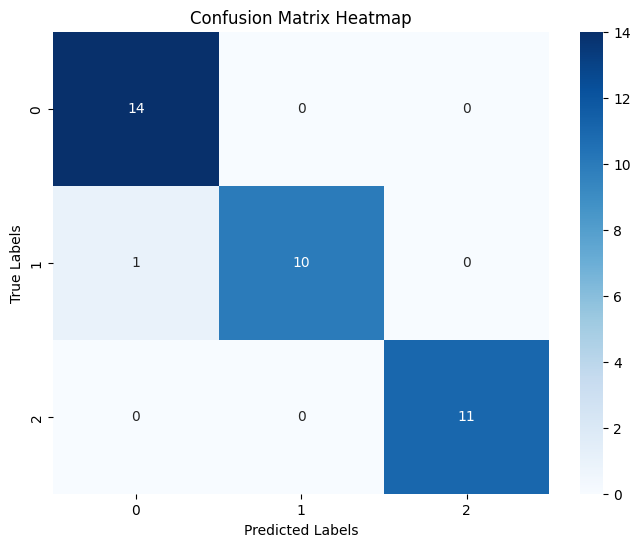

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svc_linear = SVC(kernel='linear',probability=True, random_state=42)
svc_linear.fit(X_train_scaled_wine, y_train)

y_pred_svc_linear = svc_linear.predict(X_test_scaled_wine)

print("-------------------------------------------------------")
print("Performance Evaluation:\n", classification_report(y_test, y_pred_svc_linear))
print("-------------------------------------------------------")
# Generate confusion matrix
cm = confusion_matrix(y_test,y_pred_svc_linear)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# LEARNING CURVE

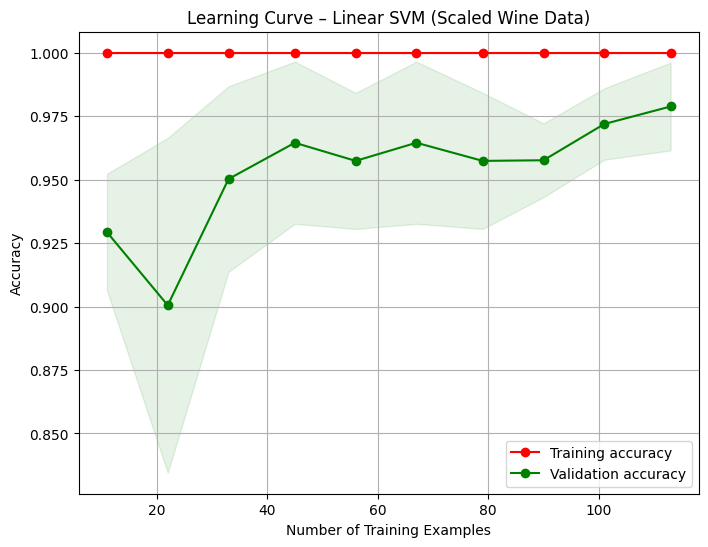

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

pipe = Pipeline([
    ('scaler', StandardScaler()),   # scales inside CV folds (important!)
    ('svc', svc_linear)
])

# --- generate learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe,
    X=X_train,                # raw train features (not scaled yet)
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',       # or f1_macro, etc.
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- mean / std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- plot ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.1, color='g')

plt.title("Learning Curve – Linear SVM (Scaled Wine Data)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


# ROC CURVE

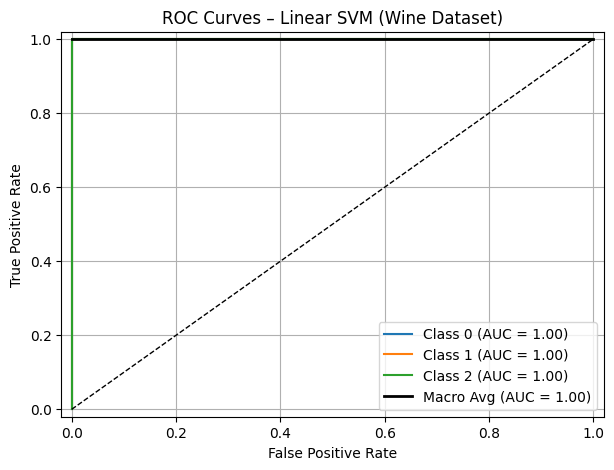

In [ ]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

y_score = svc_linear.predict_proba(X_test_scaled_wine)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

plt.figure(figsize=(7, 5))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")


plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Linear SVM (Wine Dataset)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Test For different train test split

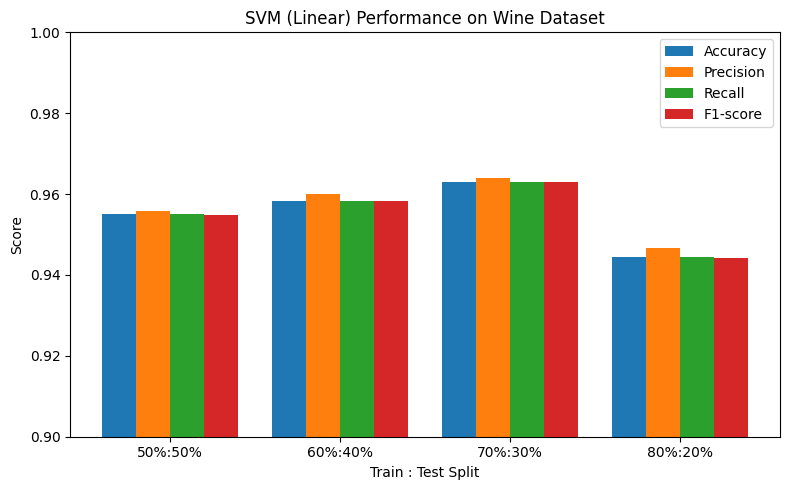

In [ ]:
test_sizes = [0.5, 0.4, 0.3, 0.2]   # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []              # to collect accuracy, precision, recall, f1

for t in test_sizes:
    # split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=t, stratify=y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # train & predict
    svc = SVC(kernel='linear', probability=True, random_state=42)
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)

    # get classification report as dict
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)  # shape (4,4)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]  # e.g. 50%:50%

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.9, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVM (Linear) Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()

# SVC linear After PCA

-------------------------------------------------------
Performance Evaluation on PCA-reduced Data:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36

-------------------------------------------------------


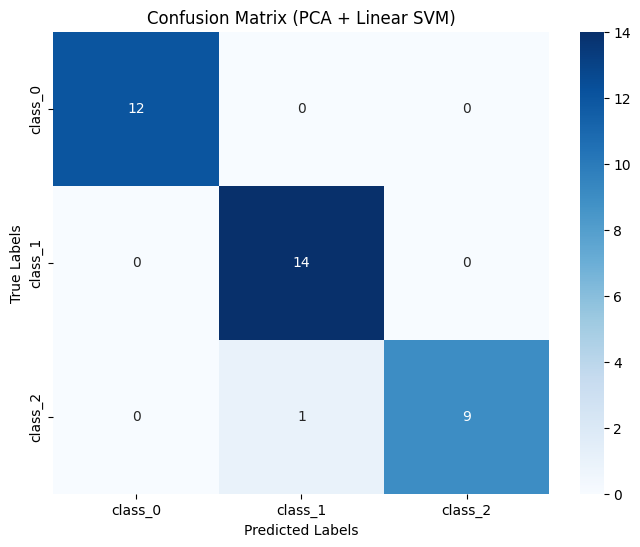

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. scale
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train)
X_test_scaled_wine  = scaler.transform(X_test)

# 2. apply PCA (choose components)
pca = PCA(n_components=7, random_state=42)
X_train_pca_wine = pca.fit_transform(X_train_scaled_wine)
X_test_pca_wine  = pca.transform(X_test_scaled_wine)

# 3. train linear SVM on reduced features
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_linear.fit(X_train_pca_wine, y_train)

# 4. predictions
y_pred_svc_linear = svc_linear.predict(X_test_pca_wine)

# 5. performance report
print("-------------------------------------------------------")
print("Performance Evaluation on PCA-reduced Data:\n",
      classification_report(y_test, y_pred_svc_linear, digits=3))
print("-------------------------------------------------------")

# 6. confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_svc_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (PCA + Linear SVM)')
plt.show()

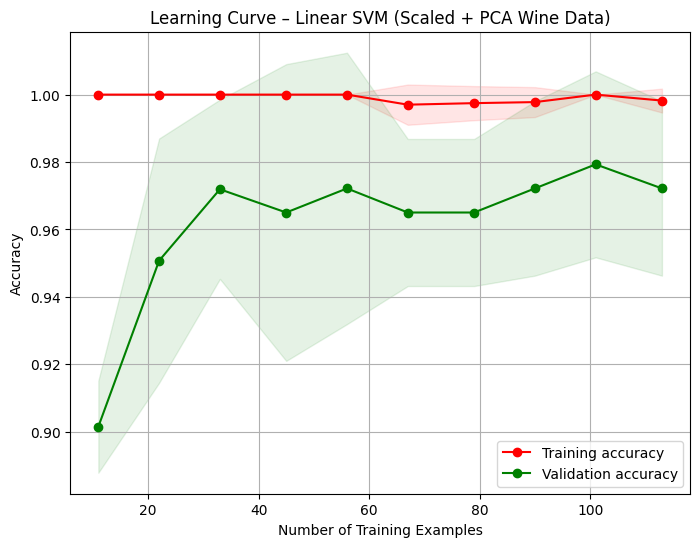

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# Pipeline: Scaling -> PCA (7 comps) -> Linear SVM
# ------------------------------------------------------------
pipe_pca_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=7, random_state=42)),
    ("svc", SVC(kernel="linear", random_state=42))
])

# ------------------------------------------------------------
# Learning curve
# ------------------------------------------------------------
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_pca_svm,
    X=X_train,           # raw training features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean / std across the CV folds
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_mean  = test_scores.mean(axis=1)
test_std   = test_scores.std(axis=1)

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", color="r", label="Training accuracy")
plt.plot(train_sizes, test_mean,  "o-", color="g", label="Validation accuracy")

# shaded bands for variability
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.1, color="g")

plt.title("Learning Curve – Linear SVM (Scaled + PCA Wine Data)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


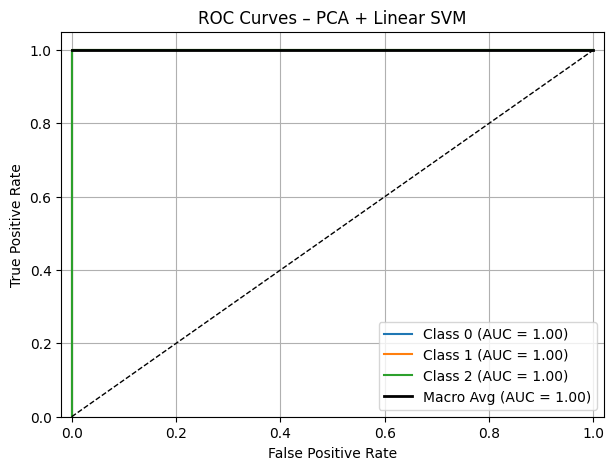

In [ ]:
y_score = svc_linear.predict_proba(X_test_pca_wine)

# --- 2. binarize y_test for multi-class ROC ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- 3. per-class ROC / AUC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 4. macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- 5. plot ---
plt.figure(figsize=(7, 5))

# per-class curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

# macro-average curve
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")

# reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([-0.02, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – PCA + Linear SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVC POLYNOMIAL

-------------------------------------------------------
Performance Evaluation – Polynomial SVM (degree=3):
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.875     1.000     0.933        14
           2      1.000     0.800     0.889        10

    accuracy                          0.944        36
   macro avg      0.958     0.933     0.941        36
weighted avg      0.951     0.944     0.943        36

-------------------------------------------------------


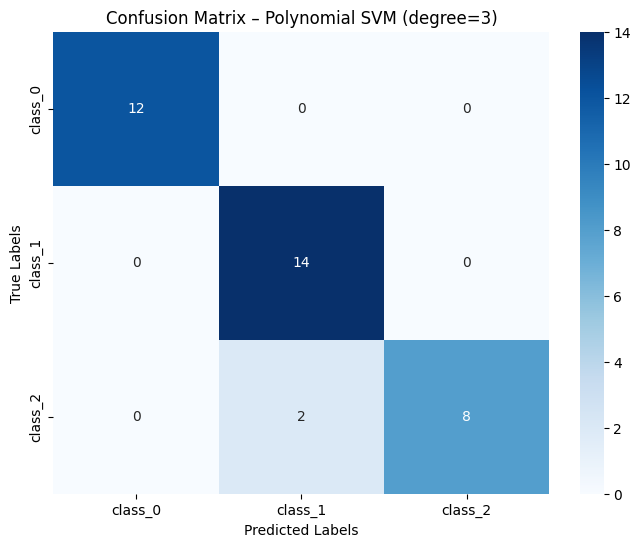

In [ ]:
# 1. Train polynomial SVM (degree = 3 by default here)
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_poly.fit(X_train_scaled_wine, y_train)

# 2. Predictions
y_pred_poly = svc_poly.predict(X_test_scaled_wine)

# 3. Report
print("-------------------------------------------------------")
print("Performance Evaluation – Polynomial SVM (degree=3):\n",
      classification_report(y_test, y_pred_poly, digits=3))
print("-------------------------------------------------------")

# 4. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Polynomial SVM (degree=3)')
plt.show()

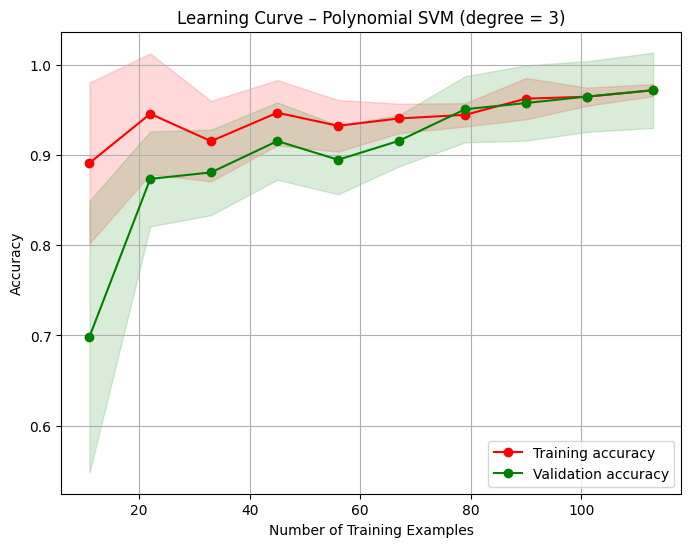

In [ ]:
pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc_poly)
])

# --- compute learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_poly,
    X=X_train,          # raw train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

plt.title("Learning Curve – Polynomial SVM (degree = 3)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

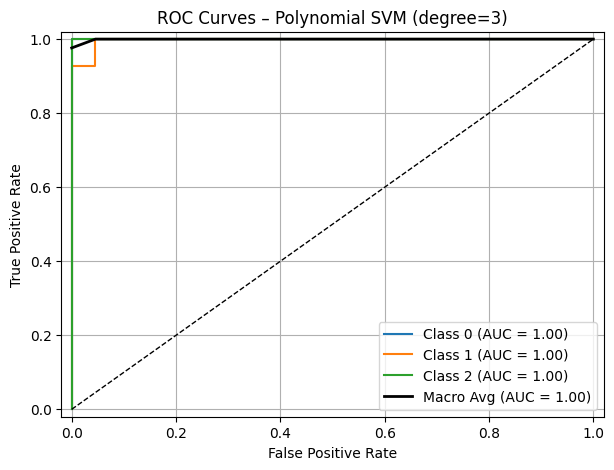

In [ ]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- predict probabilities for each class ---
y_score_poly = svc_poly.predict_proba(X_test_scaled_wine)

# --- per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_poly[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- macro average ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- plot ---
plt.figure(figsize=(7, 5))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Polynomial SVM (degree=3)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

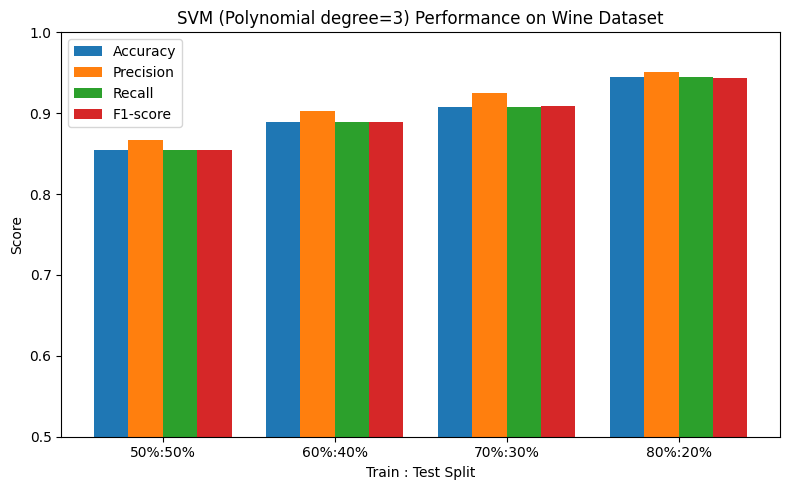

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- test fractions you want to loop over ---
test_sizes = [0.5, 0.4, 0.3, 0.2]   # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []              # collect accuracy, precision, recall, f1

for t in test_sizes:
    # split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=t, stratify=y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # --- Polynomial SVM (degree = 3) ---
    svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
    svc_poly.fit(X_train_scaled, y_train)
    y_pred = svc_poly.predict(X_test_scaled)

    # --- collect metrics ---
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)  # shape (4,4)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]  # e.g. 50%:50%

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:, 0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:, 1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:, 2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:, 3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.5, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVM (Polynomial degree=3) Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()

# AFTER PCA

-------------------------------------------------------
Performance Evaluation – Polynomial SVM (PCA-reduced, degree=3):
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.875     1.000     0.933        14
           2      1.000     0.800     0.889        10

    accuracy                          0.944        36
   macro avg      0.958     0.933     0.941        36
weighted avg      0.951     0.944     0.943        36

-------------------------------------------------------


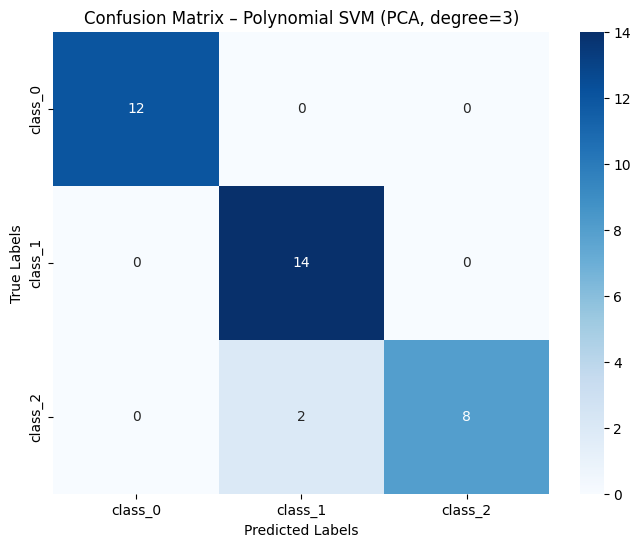

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scale
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train)
X_test_scaled_wine  = scaler.transform(X_test)

# 2. PCA
pca = PCA(n_components=7, random_state=42)
X_train_pca_wine = pca.fit_transform(X_train_scaled_wine)
X_test_pca_wine  = pca.transform(X_test_scaled_wine)

# 3. Train Polynomial SVM (degree=3)
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_poly.fit(X_train_pca_wine, y_train)

# 4. Predictions
y_pred_poly = svc_poly.predict(X_test_pca_wine)

# 5. Performance report
print("-------------------------------------------------------")
print("Performance Evaluation – Polynomial SVM (PCA-reduced, degree=3):\n",
      classification_report(y_test, y_pred_poly, digits=3))
print("-------------------------------------------------------")

# 6. Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Polynomial SVM (PCA, degree=3)')
plt.show()


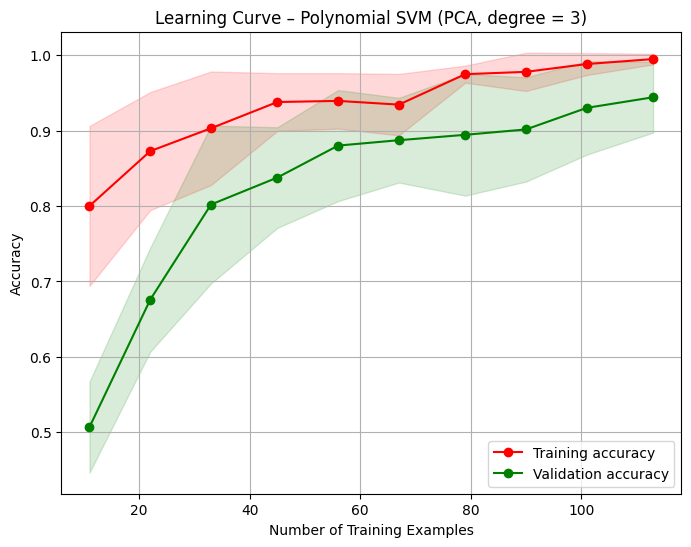

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Pipeline: scale + polynomial SVM
pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc_poly)
])

# Compute learning curves on PCA data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_poly,
    X=X_train_pca_wine,  # PCA-reduced train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean & standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')
plt.title("Learning Curve – Polynomial SVM (PCA, degree = 3)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


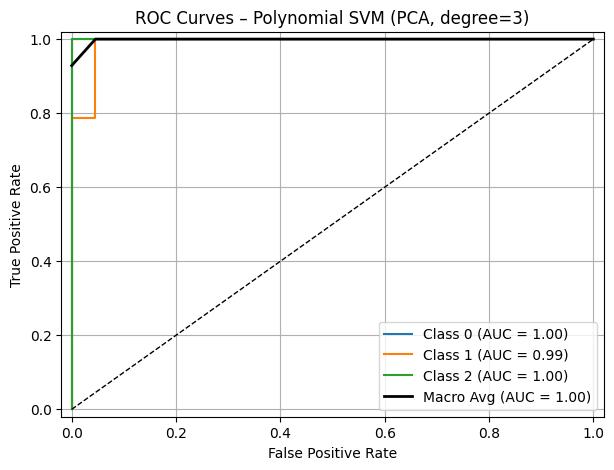

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score_poly = svc_poly.predict_proba(X_test_pca_wine)

# Compute ROC per class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_poly[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Polynomial SVM (PCA, degree=3)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVC RBF

-------------------------------------------------------
Performance Evaluation – RBF SVM:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36

-------------------------------------------------------


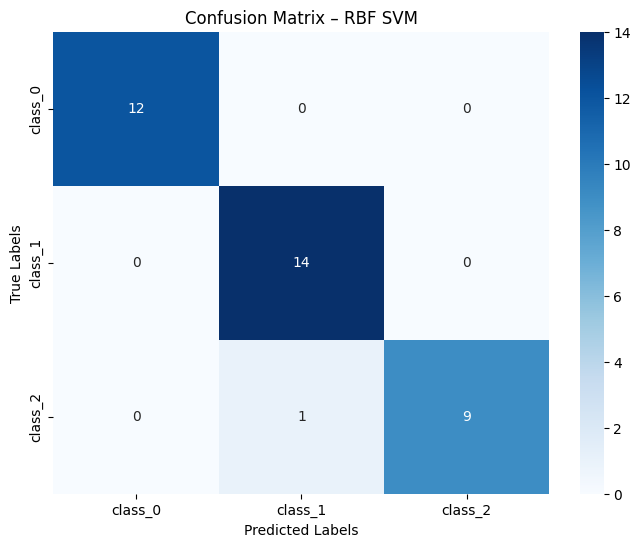

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 2. Train RBF SVM
classifier_rbf = SVC(kernel='rbf', probability=True, random_state=42)
classifier_rbf.fit(X_train_scaled, y_train)

# 3. Predictions
y_pred_rbf = classifier_rbf.predict(X_test_scaled)

# 4. Performance report
print("-------------------------------------------------------")
print("Performance Evaluation – RBF SVM:\n",
      classification_report(y_test, y_pred_rbf, digits=3))
print("-------------------------------------------------------")

# 5. Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – RBF SVM')
plt.show()


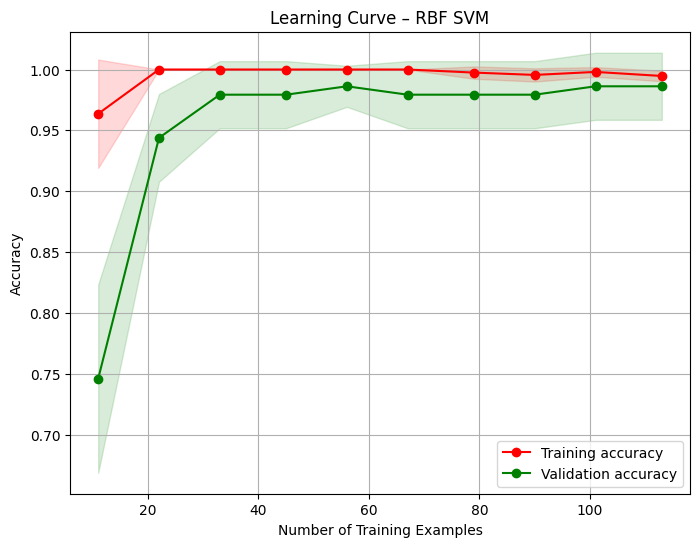

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Pipeline: scale + RBF SVM
pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', classifier_rbf)
])

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_rbf,
    X=X_train,  # raw train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean & standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')
plt.title("Learning Curve – RBF SVM")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


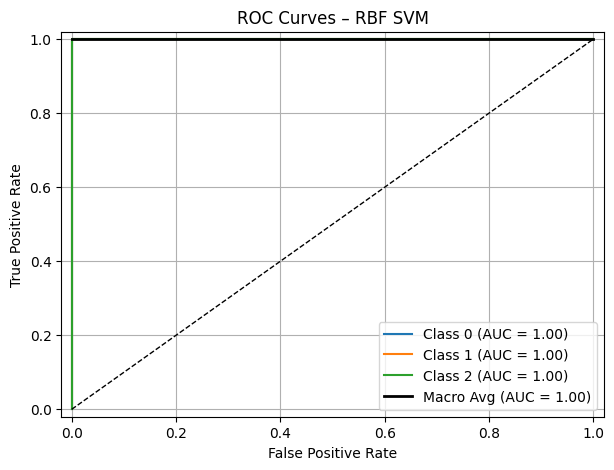

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score_rbf = classifier_rbf.predict_proba(X_test_scaled)

# Compute ROC per class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – RBF SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


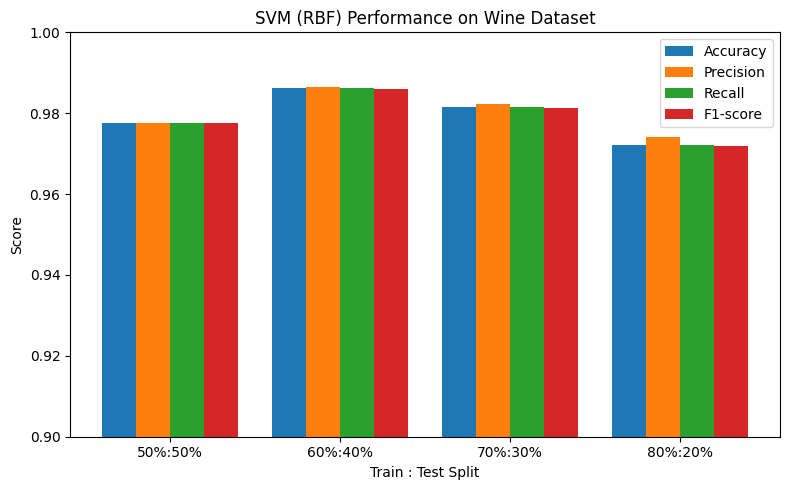

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- test fractions you want to loop over ---
test_sizes = [0.5, 0.4, 0.3, 0.2]   # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []              # collect accuracy, precision, recall, f1

for t in test_sizes:
    # split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=t, stratify=Y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # --- RBF SVM ---
    svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
    svc_rbf.fit(X_train_scaled, y_train)
    y_pred = svc_rbf.predict(X_test_scaled)

    # --- collect metrics ---
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)  # shape (4,4)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]  # e.g. 50%:50%

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:, 0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:, 1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:, 2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:, 3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.9, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVM (RBF) Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

-------------------------------------------------------
Performance Evaluation – RBF SVM (PCA-reduced):
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36

-------------------------------------------------------


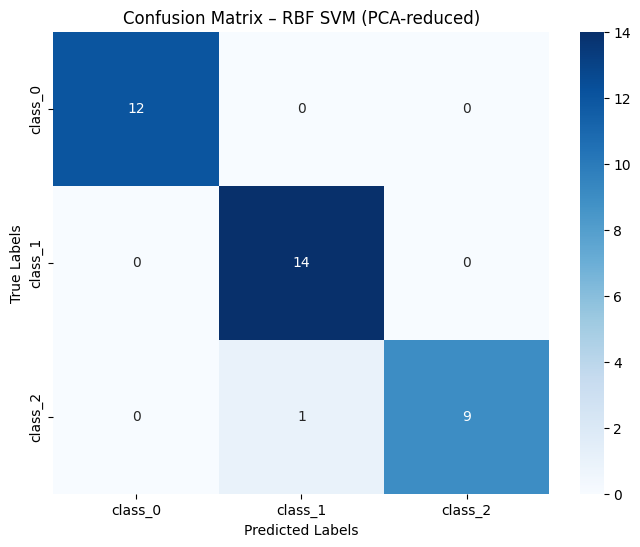

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train RBF SVM on PCA-reduced features ---
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svc_rbf.fit(X_train_pca_wine, y_train)

# --- Predictions ---
y_pred_rbf = svc_rbf.predict(X_test_pca_wine)

# --- Classification report ---
print("-------------------------------------------------------")
print("Performance Evaluation – RBF SVM (PCA-reduced):\n",
      classification_report(y_test, y_pred_rbf, digits=3))
print("-------------------------------------------------------")

# --- Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – RBF SVM (PCA-reduced)')
plt.show()


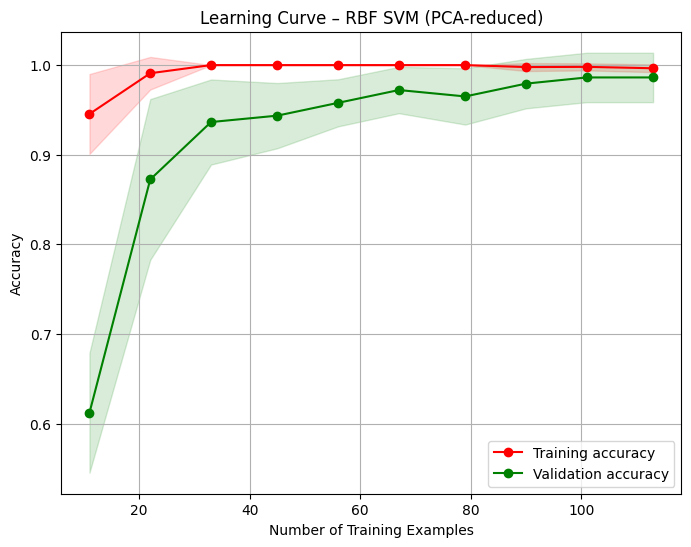

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# --- Pipeline with scaling inside CV ---
pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),   # important for RBF kernel
    ('svc', svc_rbf)
])

# --- Learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_rbf,
    X=X_train_pca_wine,       # PCA-reduced train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean and std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

plt.title("Learning Curve – RBF SVM (PCA-reduced)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


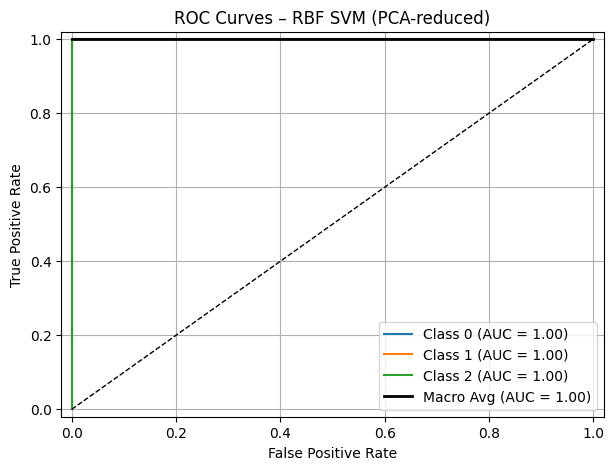

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# --- Binarize labels for multiclass ROC ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_rbf = svc_rbf.predict_proba(X_test_pca_wine)

# --- Compute per-class ROC and macro-average ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC curve ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – RBF SVM (PCA-reduced)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVC SIGMOID

-------------------------------------------------------
Performance Evaluation – Sigmoid SVM:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36

-------------------------------------------------------


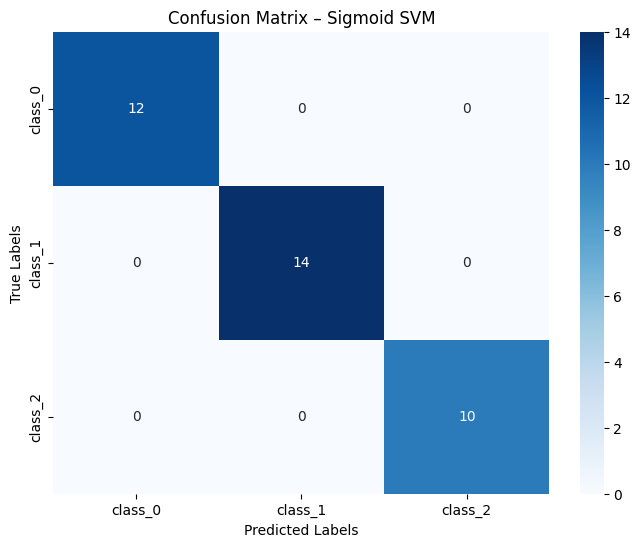

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train Sigmoid SVM ---
svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
svc_sigmoid.fit(X_train_scaled_wine, y_train)

# --- Predictions ---
y_pred_sigmoid = svc_sigmoid.predict(X_test_scaled_wine)

# --- Performance Report ---
print("-------------------------------------------------------")
print("Performance Evaluation – Sigmoid SVM:\n",
      classification_report(y_test, y_pred_sigmoid, digits=3))
print("-------------------------------------------------------")

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Sigmoid SVM')
plt.show()


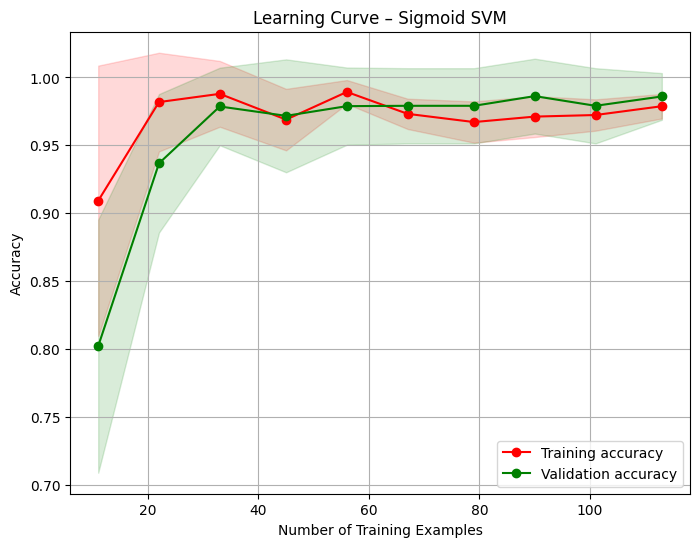

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np

pipe_sigmoid = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc_sigmoid)
])

# --- compute learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_sigmoid,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

plt.title("Learning Curve – Sigmoid SVM")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


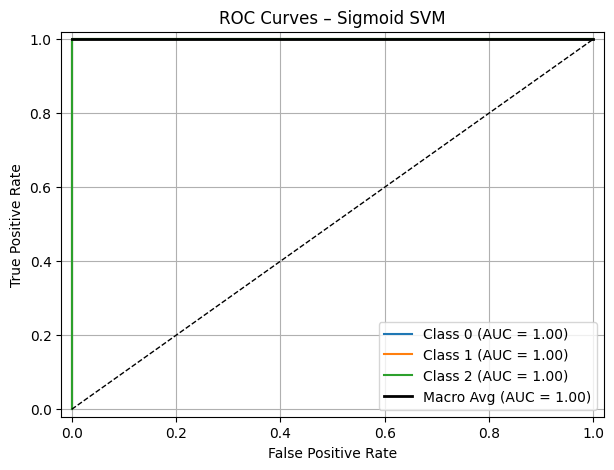

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- predict probabilities for each class ---
y_score_sigmoid = svc_sigmoid.predict_proba(X_test_scaled_wine)

# --- per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sigmoid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- macro average ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- plot ROC ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Sigmoid SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


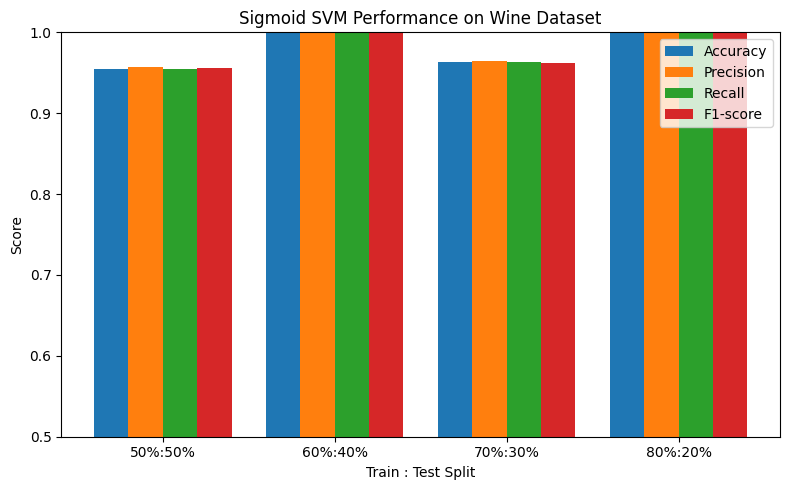

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- test fractions ---
test_sizes = [0.5, 0.4, 0.3, 0.2]
metrics_per_split = []

for t in test_sizes:
    # split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=t, stratify=Y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # train & predict
    svc_sigmoid_split = SVC(kernel='sigmoid', probability=True, random_state=42)
    svc_sigmoid_split.fit(X_train_scaled, y_train)
    y_pred = svc_sigmoid_split.predict(X_test_scaled)

    # collect metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:, 0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:, 1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:, 2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:, 3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.5, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("Sigmoid SVM Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

-------------------------------------------------------
Performance Evaluation – Sigmoid SVM (PCA):
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36

-------------------------------------------------------


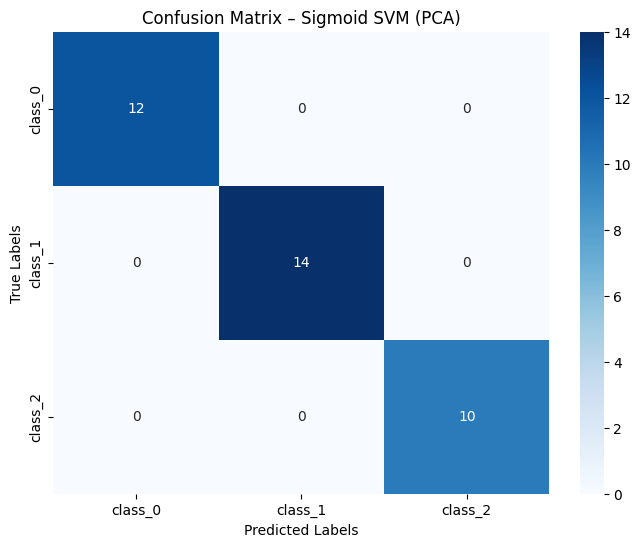

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train Sigmoid SVM on PCA-reduced data ---
svc_sigmoid_pca = SVC(kernel='sigmoid', probability=True, random_state=42)
svc_sigmoid_pca.fit(X_train_pca_wine, y_train)

# --- Predictions ---
y_pred_sigmoid_pca = svc_sigmoid_pca.predict(X_test_pca_wine)

# --- Performance Report ---
print("-------------------------------------------------------")
print("Performance Evaluation – Sigmoid SVM (PCA):\n",
      classification_report(y_test, y_pred_sigmoid_pca, digits=3))
print("-------------------------------------------------------")

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_sigmoid_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Sigmoid SVM (PCA)')
plt.show()


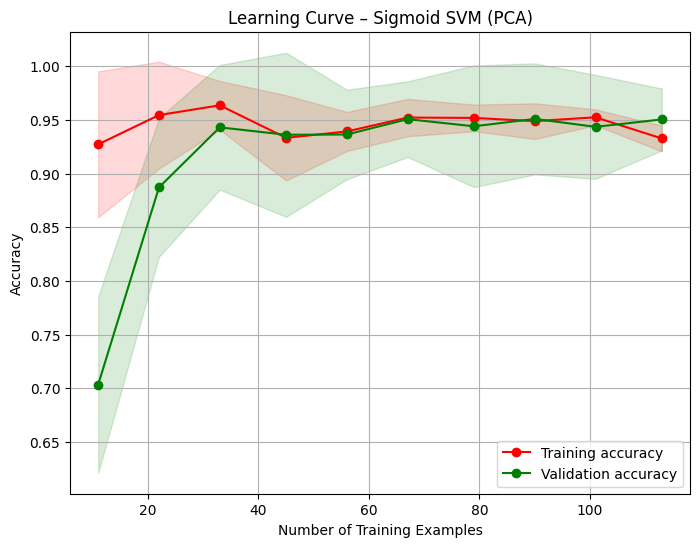

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

pipe_sigmoid_pca = Pipeline([
    ('scaler', StandardScaler()),   # optional but scales inside CV folds
    ('svc', svc_sigmoid_pca)
])

# --- compute learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_sigmoid_pca,
    X=X_train_pca_wine,    # PCA features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

plt.title("Learning Curve – Sigmoid SVM (PCA)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


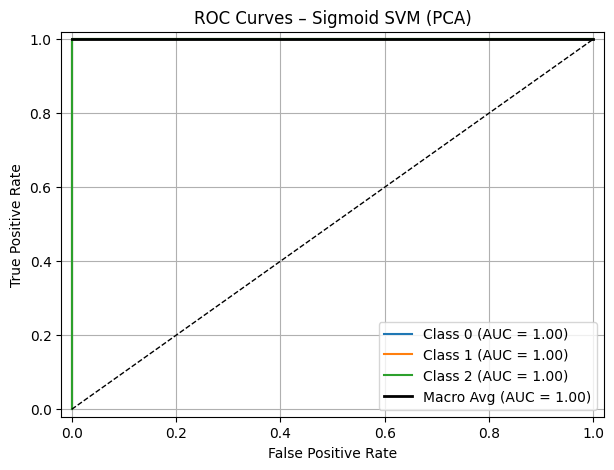

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- predict probabilities for PCA features ---
y_score_sigmoid_pca = svc_sigmoid_pca.predict_proba(X_test_pca_wine)

# --- per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sigmoid_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- macro average ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- plot ROC ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Sigmoid SVM (PCA)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'coef0': [0, 0.1, 0.5, 1]
}


classifier_4 = SVC(kernel='sigmoid')
classifier_4 = GridSearchCV(classifier_4, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
classifier_4.fit(X_train, y_train)

y_pred_4 = classifier_4.predict(X_test)

#Evaluation of Classifier Performence

print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred_4))

print("-------------------------------------------------------")
print("-------------------------------------------------------")

print("Performance Evaluation : ")
print(classification_report(y_test,y_pred_4))
print(classifier_4.best_params_)

Confusion Matrix : 
[[ 0 12  0]
 [ 0 13  0]
 [ 0 11  0]]
-------------------------------------------------------
-------------------------------------------------------
Performance Evaluation : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.36      1.00      0.53        13
           3       0.00      0.00      0.00        11

    accuracy                           0.36        36
   macro avg       0.12      0.33      0.18        36
weighted avg       0.13      0.36      0.19        36

{'C': 0.01, 'coef0': 0, 'gamma': 'scale'}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


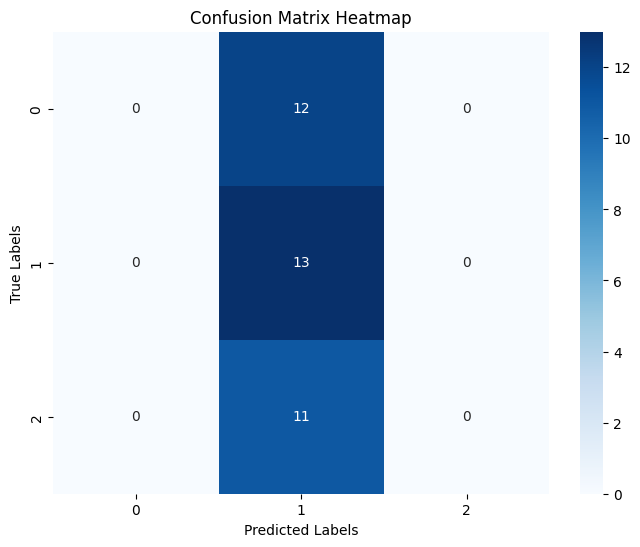

In [ ]:
# Generate confusion matrix
cm =confusion_matrix(y_test,y_pred_4)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# MLP

-------------------------------------------------------
Performance Evaluation – MLP Classifier:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36

-------------------------------------------------------


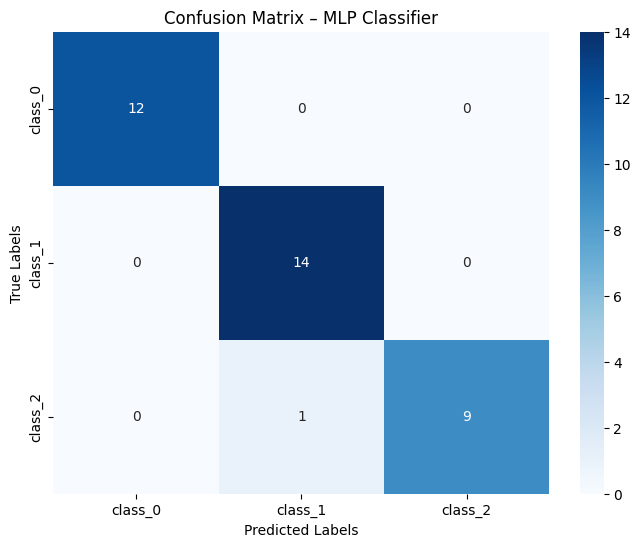

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train MLP ---
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                    solver='adam', learning_rate_init=0.01,
                    max_iter=300, momentum=0.9, random_state=42)
mlp.fit(X_train_scaled_wine, y_train)

# --- Predictions ---
y_pred_mlp = mlp.predict(X_test_scaled_wine)

# --- Performance report ---
print("-------------------------------------------------------")
print("Performance Evaluation – MLP Classifier:\n",
      classification_report(y_test, y_pred_mlp, digits=3))
print("-------------------------------------------------------")

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – MLP Classifier')
plt.show()


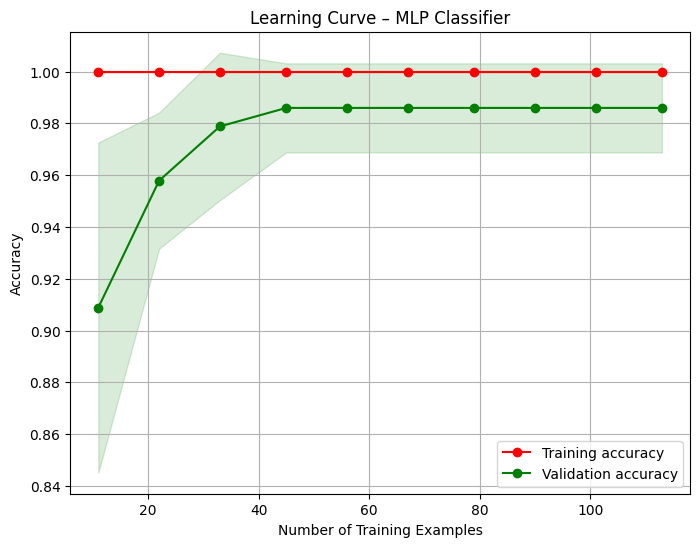

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

# --- Compute learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_mlp,
    X=X_train,          # raw train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')
plt.title("Learning Curve – MLP Classifier")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


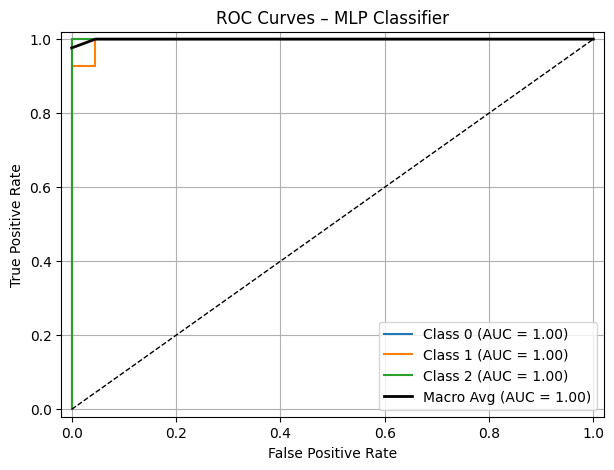

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_mlp = mlp.predict_proba(X_test_scaled_wine)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – MLP Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


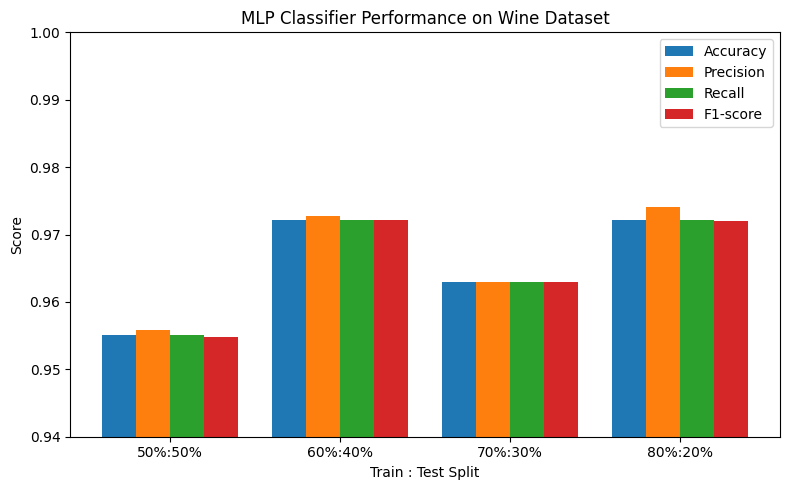

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.5, 0.4, 0.3, 0.2]
metrics_per_split = []

for t in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=t, stratify=Y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    mlp_split = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                              solver='adam', learning_rate_init=0.01,
                              max_iter=300, momentum=0.9, random_state=42)
    mlp_split.fit(X_train_scaled, y_train)
    y_pred = mlp_split.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:, 0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:, 1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:, 2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:, 3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.94, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("MLP Classifier Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

-------------------------------------------------------
Performance Evaluation – MLP Classifier (PCA-reduced Data):
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36

-------------------------------------------------------


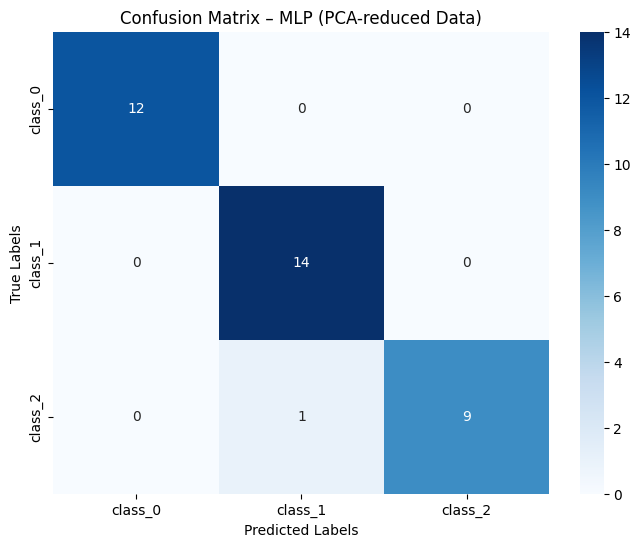

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Scale the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- 2. Apply PCA ---
pca = PCA(n_components=7, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- 3. Train MLP on PCA features ---
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                        solver='adam', learning_rate_init=0.01,
                        max_iter=300, momentum=0.9, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# --- 4. Predictions ---
y_pred_pca = mlp_pca.predict(X_test_pca)

# --- 5. Performance Report ---
print("-------------------------------------------------------")
print("Performance Evaluation – MLP Classifier (PCA-reduced Data):\n",
      classification_report(y_test, y_pred_pca, digits=3))
print("-------------------------------------------------------")

# --- 6. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – MLP (PCA-reduced Data)')
plt.show()


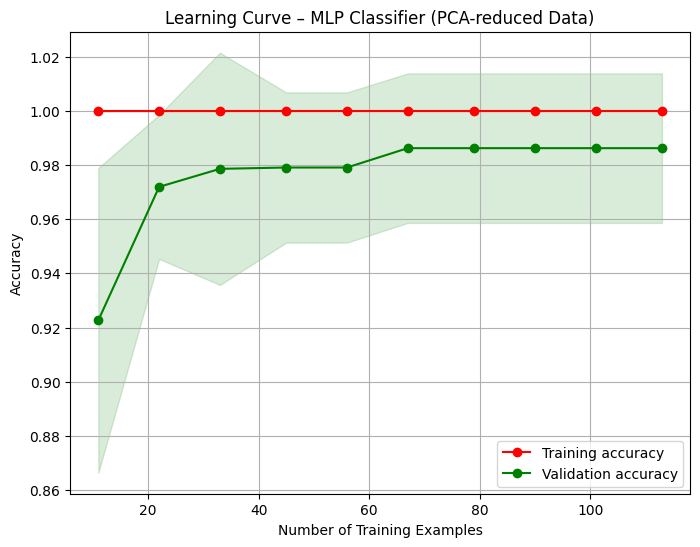

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

pipe_mlp_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7, random_state=42)),
    ('mlp', mlp_pca)
])

# --- Generate learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_mlp_pca,
    X=X_train,           # raw train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Compute mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')
plt.title("Learning Curve – MLP Classifier (PCA-reduced Data)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


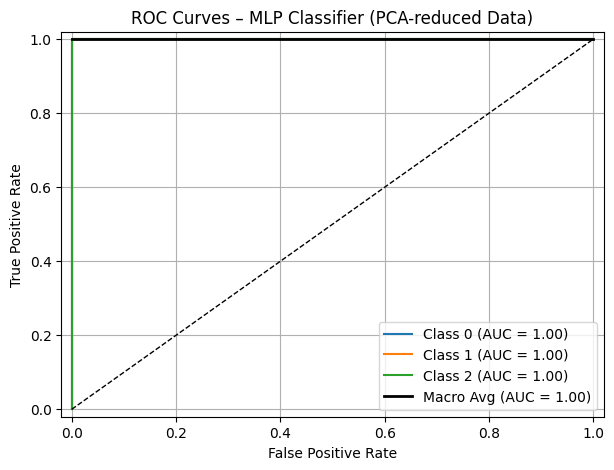

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_mlp_pca = mlp_pca.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_mlp_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – MLP Classifier (PCA-reduced Data)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# RANDOM_FOREST

-------------------------------------------------------
Performance Evaluation – Random Forest Classifier:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36

-------------------------------------------------------


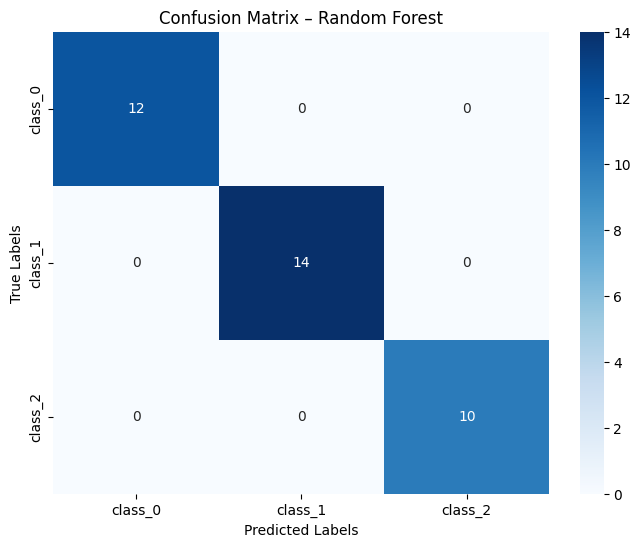

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train Random Forest ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred_rf = rf_clf.predict(X_test)

# --- Performance Report ---
print("-------------------------------------------------------")
print("Performance Evaluation – Random Forest Classifier:\n",
      classification_report(y_test, y_pred_rf, digits=3))
print("-------------------------------------------------------")

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Random Forest')
plt.show()


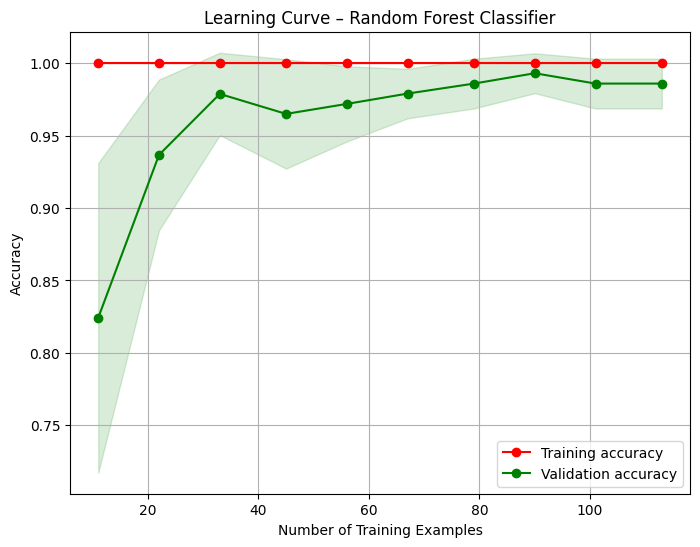

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
import numpy as np

pipe_rf = Pipeline([
    ('rf', rf_clf)
])

# --- Generate learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_rf,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Compute mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')
plt.title("Learning Curve – Random Forest Classifier")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


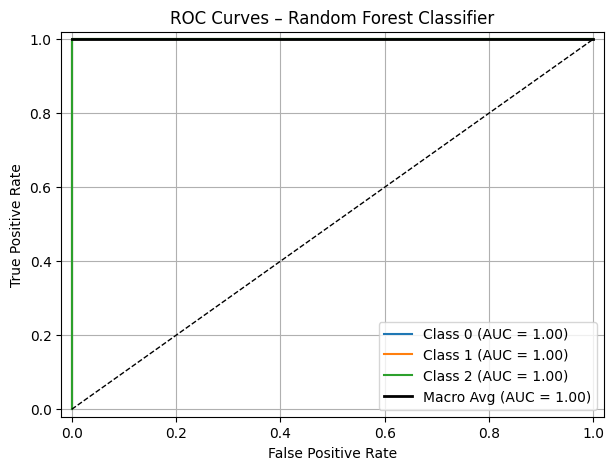

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_rf = rf_clf.predict_proba(X_test)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2,
         label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


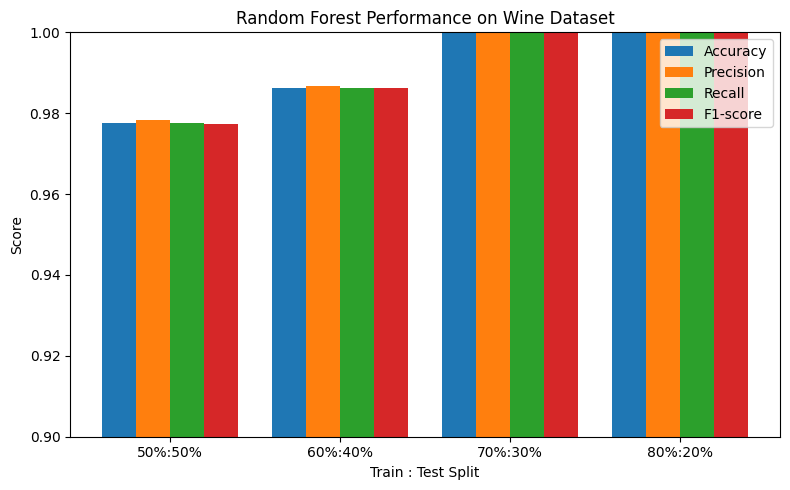

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.5, 0.4, 0.3, 0.2]  # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=t, stratify=Y, random_state=42)
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_te_scaled = scaler.transform(X_te)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_tr_scaled, y_tr)
    y_pred_split = rf.predict(X_te_scaled)

    report = classification_report(y_te, y_pred_split, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.9, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("Random Forest Performance on Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

-------------------------------------------------------
Performance Evaluation – Random Forest (PCA Data):
               precision    recall  f1-score   support

           0      0.917     0.917     0.917        12
           1      0.929     0.929     0.929        14
           2      1.000     1.000     1.000        10

    accuracy                          0.944        36
   macro avg      0.948     0.948     0.948        36
weighted avg      0.944     0.944     0.944        36

-------------------------------------------------------


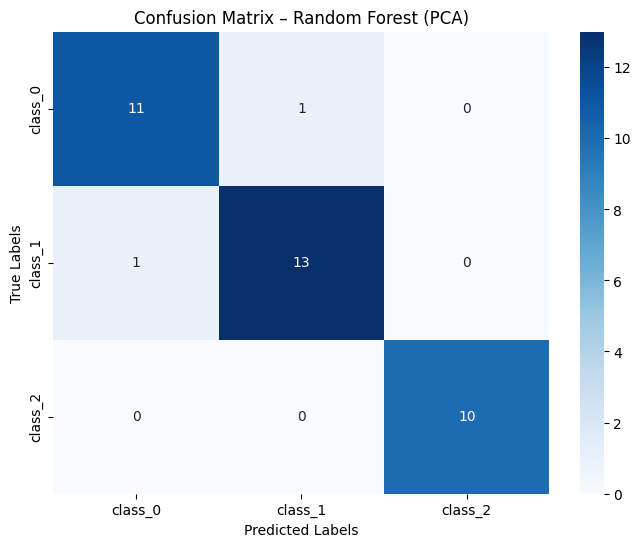

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest on PCA-reduced data
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_rf_pca = rf_pca.predict(X_test_pca)

# Performance report
print("-------------------------------------------------------")
print("Performance Evaluation – Random Forest (PCA Data):\n",
      classification_report(y_test, y_pred_rf_pca, digits=3))
print("-------------------------------------------------------")

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rf_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – Random Forest (PCA)')
plt.show()


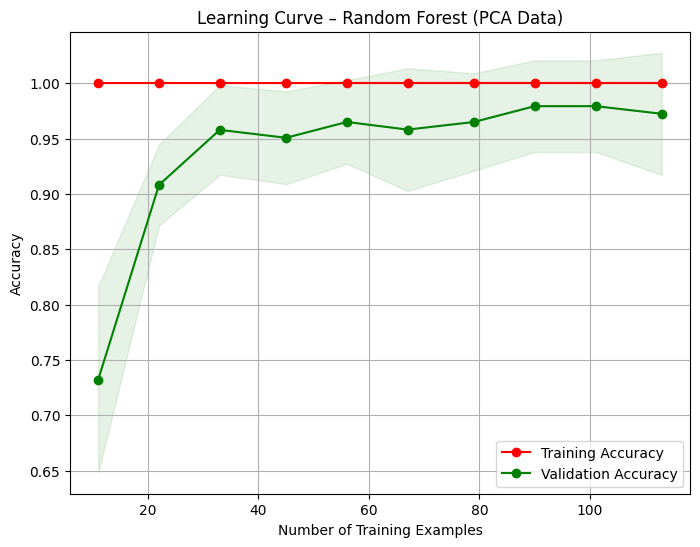

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Pipeline is optional here as scaling is already applied via PCA
train_sizes, train_scores, test_scores = learning_curve(
    estimator=RandomForestClassifier(random_state=42),
    X=X_train_pca,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – Random Forest (PCA Data)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


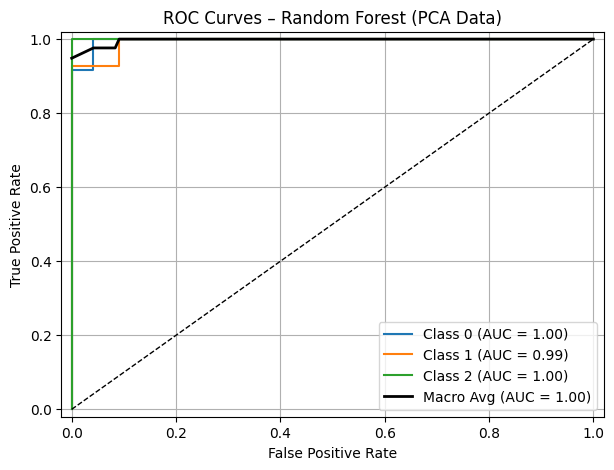

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predicted probabilities
y_score_rf = rf_pca.predict_proba(X_test_pca)

# Per-class ROC and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color='black', lw=2, label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest (PCA Data)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# FOR HAND WRITTEN DATASET

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

# Fetch dataset
handwritten = fetch_ucirepo(id=80)

# Extract features and target
X = handwritten.data.features
y = handwritten.data.targets

X_scaled = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# 70:30 split (typical good split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


# SVC(LINEAR)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Linear:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       166
           1       0.95      0.98      0.97       171
           2       1.00      0.99      1.00       167
           3       0.94      0.99      0.97       172
           4       0.99      0.99      0.99       171
           5       0.98      0.98      0.98       167
           6       1.00      0.99      0.99       167
           7       0.99      0.98      0.99       170
           8       0.96      0.95      0.95       166
           9       0.96      0.95      0.96       169

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686



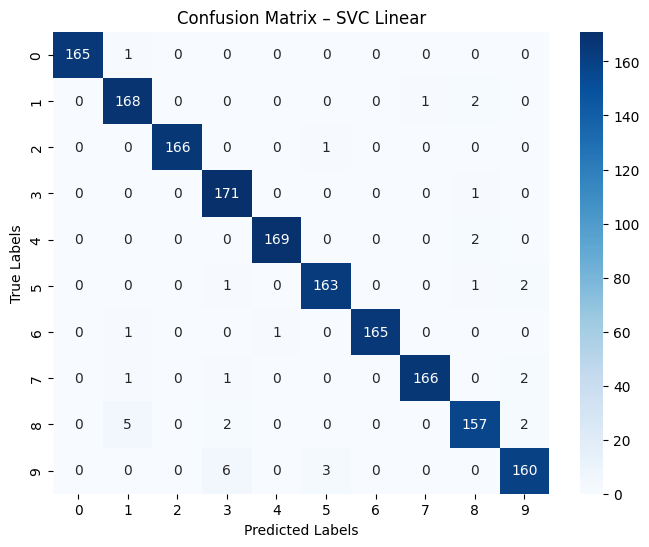

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scale the data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- Train SVC Linear ---
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_linear.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = svc_linear.predict(X_test_scaled)

# --- Performance Report ---
print("Performance Evaluation – SVC Linear:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Linear')
plt.show()


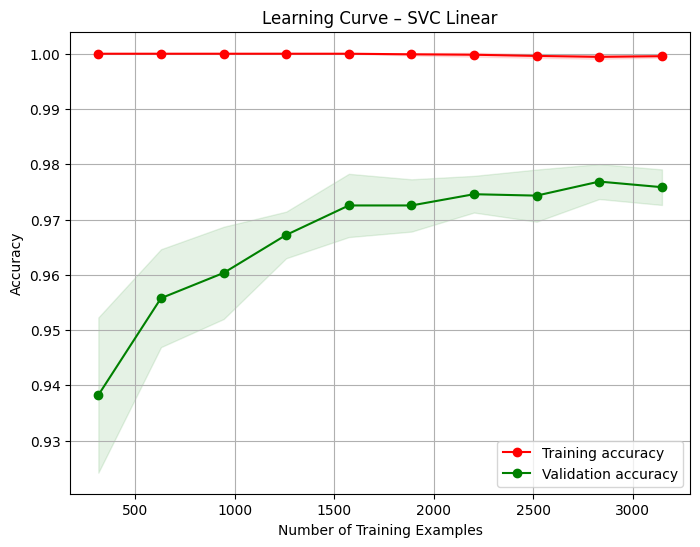

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline with scaling and SVC ---
pipe = Pipeline([
    ('scaler', StandardScaler()),  # ensures scaling within CV folds
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
])

# --- Compute learning curves ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe,
    X=X_train,           # raw train features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Linear")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


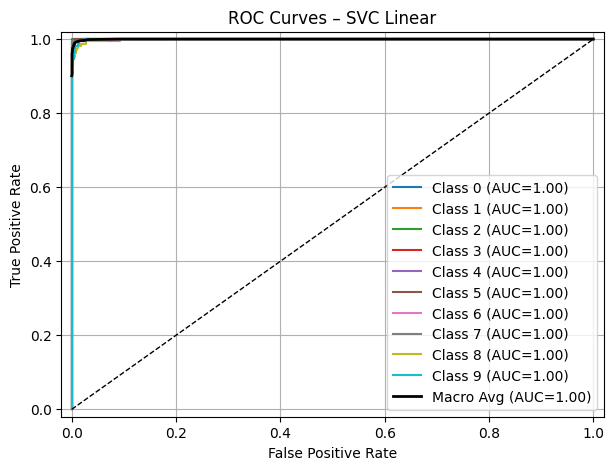

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score = svc_linear.predict_proba(X_test_scaled)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Linear")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

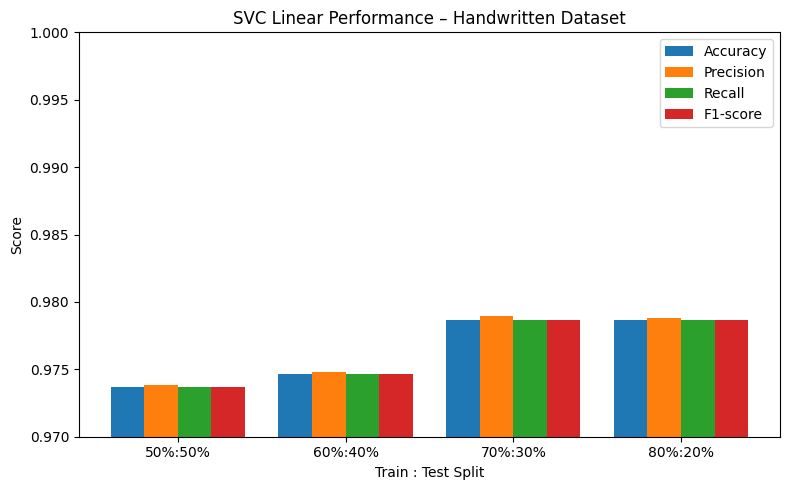

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.5, 0.4, 0.3, 0.2]  # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=t, stratify=y, random_state=42)
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_te_scaled = scaler.transform(X_te)

    svc = SVC(kernel='linear', probability=True, random_state=42)
    svc.fit(X_tr_scaled, y_tr)
    y_pred = svc.predict(X_te_scaled)

    report = classification_report(y_te, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]
x = np.arange(len(labels))
bar_width = 0.2

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.97,1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVC Linear Performance – Handwritten Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Linear (PCA-reduced):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       166
           1       0.96      0.99      0.97       171
           2       1.00      0.99      1.00       167
           3       0.97      0.99      0.98       172
           4       0.99      0.98      0.98       171
           5       0.98      0.98      0.98       167
           6       0.99      0.98      0.99       167
           7       0.99      0.98      0.99       170
           8       0.96      0.96      0.96       166
           9       0.96      0.96      0.96       169

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686



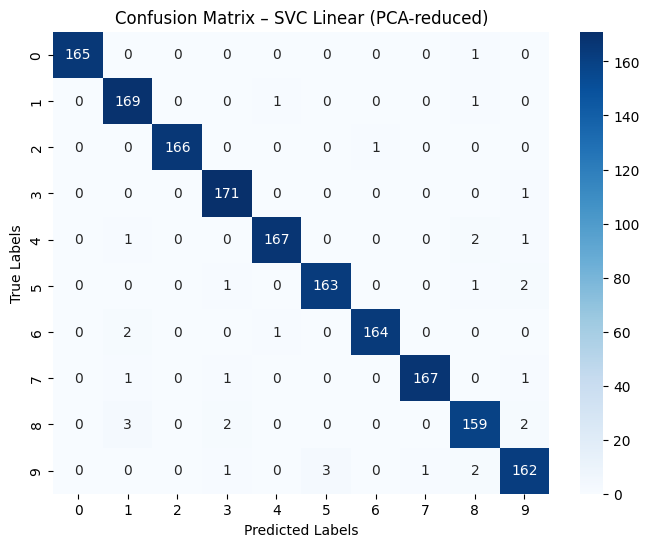

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scale ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- PCA ---
pca = PCA(n_components=50, random_state=42)  # adjust n_components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- Train SVC Linear ---
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_linear.fit(X_train_pca, y_train)

# --- Predictions ---
y_pred = svc_linear.predict(X_test_pca)

# --- Performance Report ---
print("Performance Evaluation – SVC Linear (PCA-reduced):")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Linear (PCA-reduced)')
plt.show()


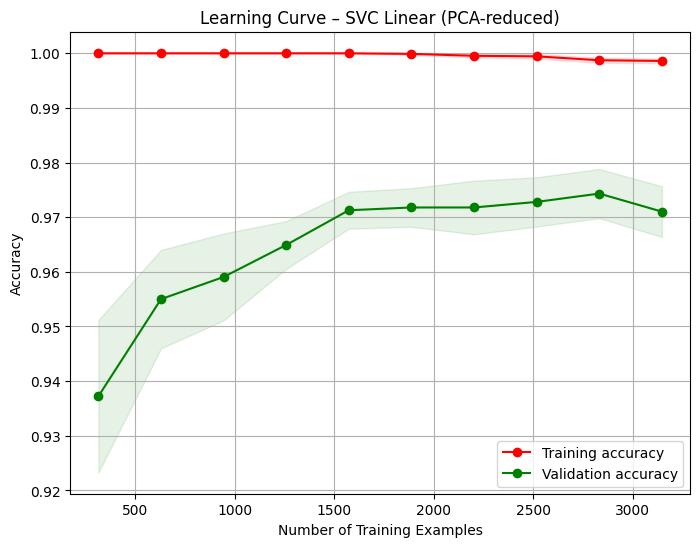

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline with scaling, PCA, and SVC ---
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
])

# --- Learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Linear (PCA-reduced)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


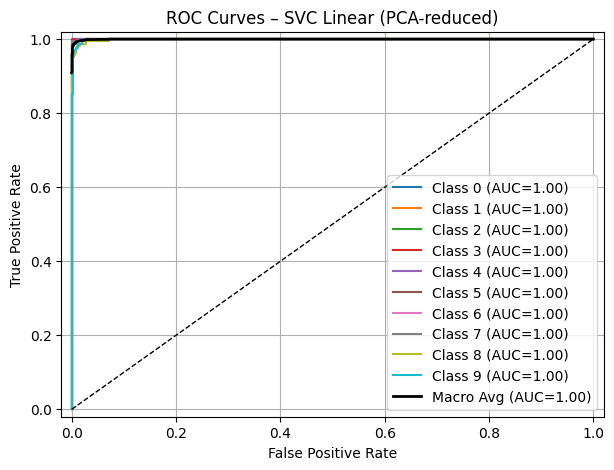

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score = svc_linear.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Linear (PCA-reduced)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVC(POLINOMIAL)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Polynomial (degree=3):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       166
           1       1.00      0.99      0.99       171
           2       1.00      0.98      0.99       167
           3       0.99      0.96      0.98       172
           4       1.00      0.98      0.99       171
           5       0.98      0.97      0.98       167
           6       1.00      0.98      0.99       167
           7       0.99      0.99      0.99       170
           8       0.85      1.00      0.92       166
           9       0.98      0.94      0.96       169

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686



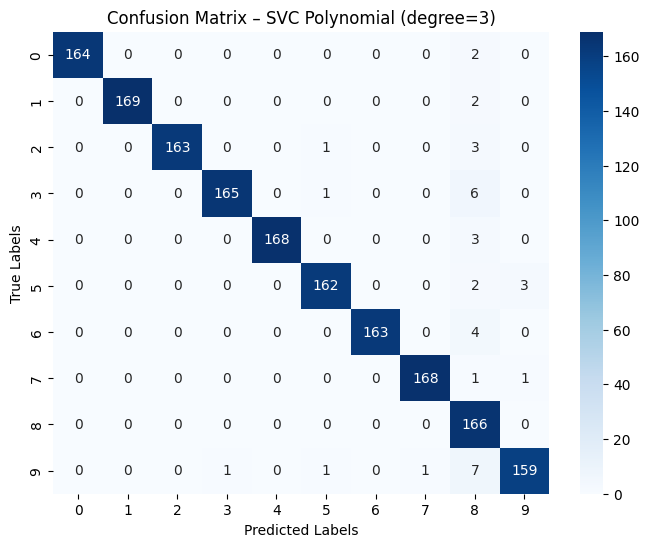

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Scale the data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- Train SVC Polynomial ---
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_poly.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_poly = svc_poly.predict(X_test_scaled)

# --- Performance Report ---
print("Performance Evaluation – SVC Polynomial (degree=3):")
print(classification_report(y_test, y_pred_poly))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Polynomial (degree=3)')
plt.show()


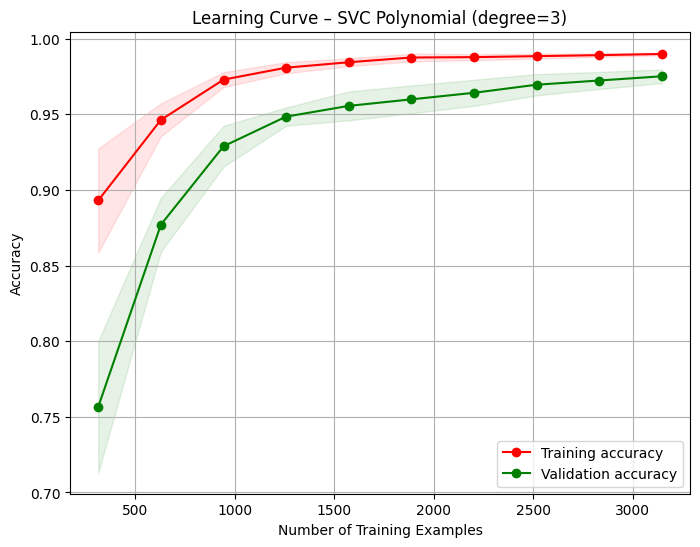

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
import numpy as np

# --- Pipeline with scaling + SVC Polynomial ---
pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='poly', degree=3, probability=True, random_state=42))
])

# --- Learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_poly,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Polynomial (degree=3)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


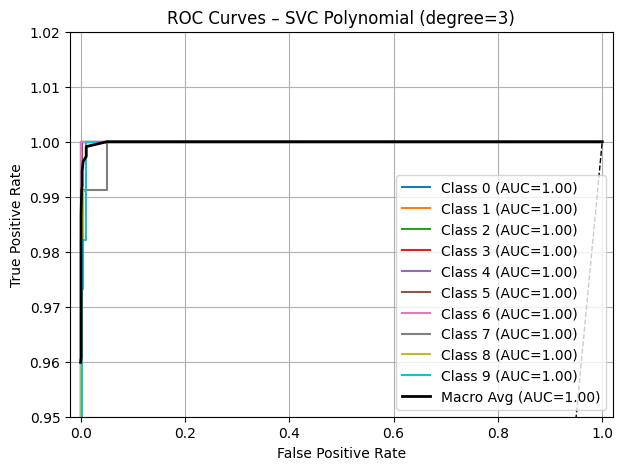

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_poly = svc_poly.predict_proba(X_test_scaled)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_poly[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.95,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Polynomial (degree=3)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

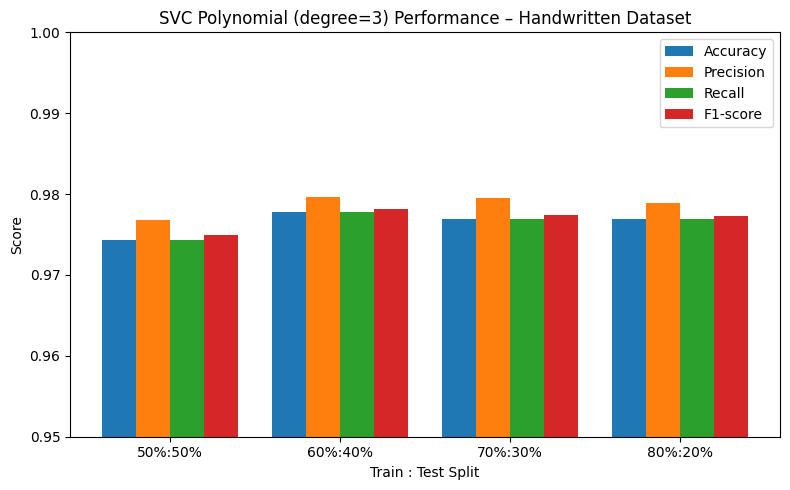

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

test_sizes = [0.5, 0.4, 0.3, 0.2]  # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    # Split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=t, stratify=y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # Train & predict
    svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
    svc_poly.fit(X_train_scaled, y_train)
    y_pred = svc_poly.predict(X_test_scaled)

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.95,1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVC Polynomial (degree=3) Performance – Handwritten Dataset")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Polynomial (degree=3) with PCA:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.99      0.98      0.99       114
           2       1.00      0.99      1.00       111
           3       0.99      0.96      0.97       114
           4       1.00      0.98      0.99       114
           5       0.98      0.97      0.98       112
           6       1.00      0.97      0.99       112
           7       1.00      0.98      0.99       113
           8       0.86      0.99      0.92       111
           9       0.96      0.96      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



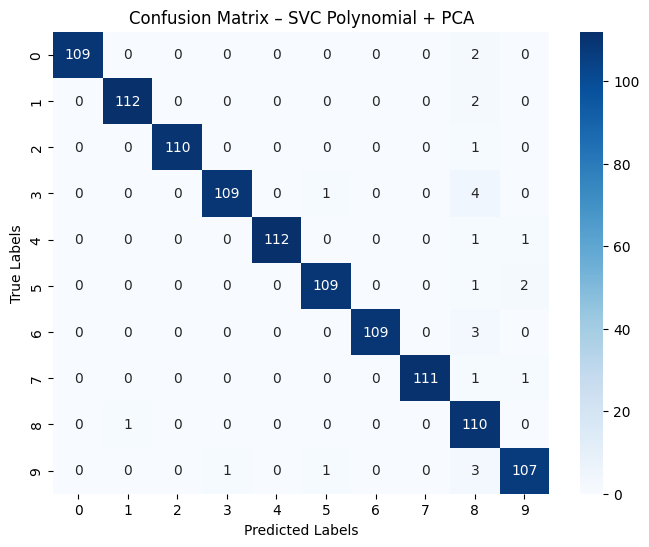

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Apply PCA ---
pca = PCA(n_components=50, random_state=42)  # you can adjust components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- Train SVC Polynomial ---
svc_poly_pca = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_poly_pca.fit(X_train_pca, y_train)

# --- Predictions ---
y_pred_poly_pca = svc_poly_pca.predict(X_test_pca)

# --- Performance Report ---
print("Performance Evaluation – SVC Polynomial (degree=3) with PCA:")
print(classification_report(y_test, y_pred_poly_pca))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_poly_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Polynomial + PCA')
plt.show()


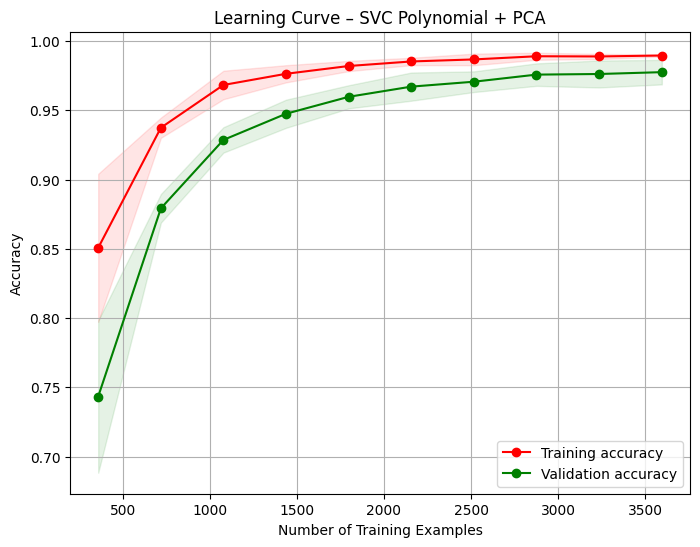

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
import numpy as np

# --- Pipeline: PCA + SVC Polynomial ---
pipe_poly_pca = Pipeline([
    ('pca', PCA(n_components=50, random_state=42)),
    ('svc', SVC(kernel='poly', degree=3, probability=True, random_state=42))
])

# --- Learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_poly_pca,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Polynomial + PCA")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


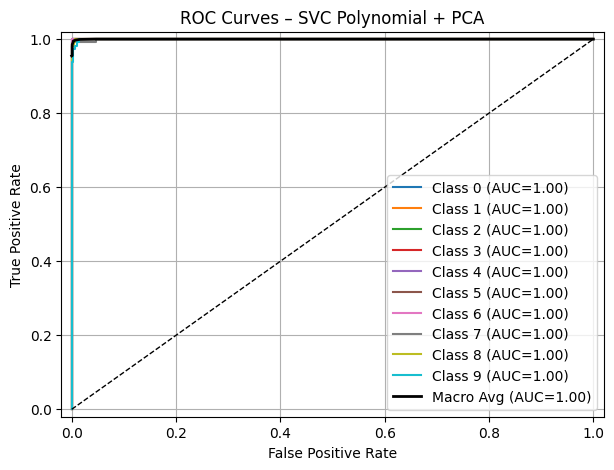

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_poly_pca = svc_poly_pca.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_poly_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Polynomial + PCA")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVC RBF

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC RBF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      0.99      0.99       114
           2       1.00      0.99      1.00       111
           3       0.97      0.99      0.98       114
           4       0.97      1.00      0.98       114
           5       0.98      0.99      0.99       112
           6       0.99      0.99      0.99       112
           7       1.00      0.97      0.99       113
           8       1.00      0.96      0.98       111
           9       0.97      0.97      0.97       112

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



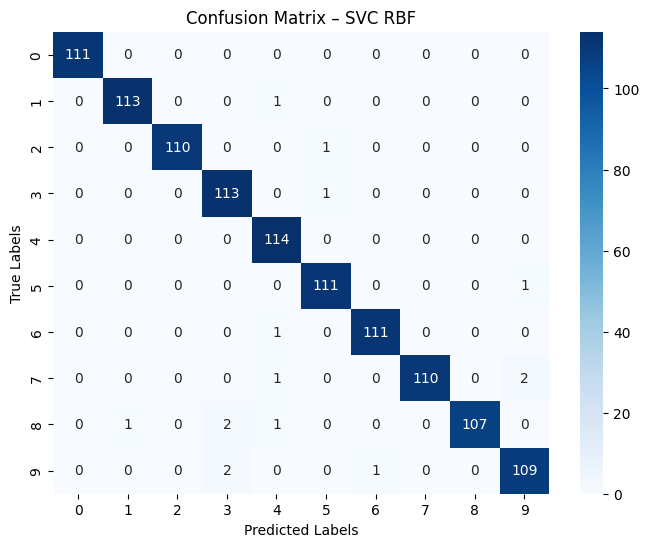

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train SVC RBF ---
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svc_rbf.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_rbf = svc_rbf.predict(X_test_scaled)

# --- Performance Report ---
print("Performance Evaluation – SVC RBF:")
print(classification_report(y_test, y_pred_rbf))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC RBF')
plt.show()


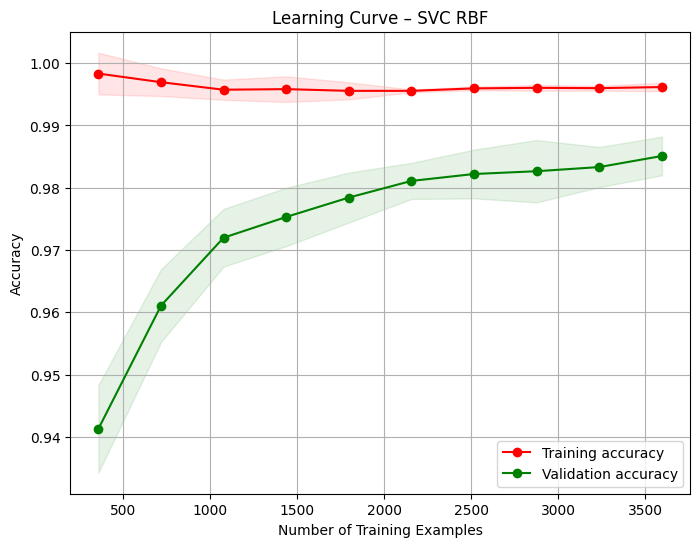

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
import numpy as np

# --- Pipeline ---
pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),  # scales inside CV folds
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

# --- Learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_rbf,
    X=X_train,         # raw features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC RBF")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


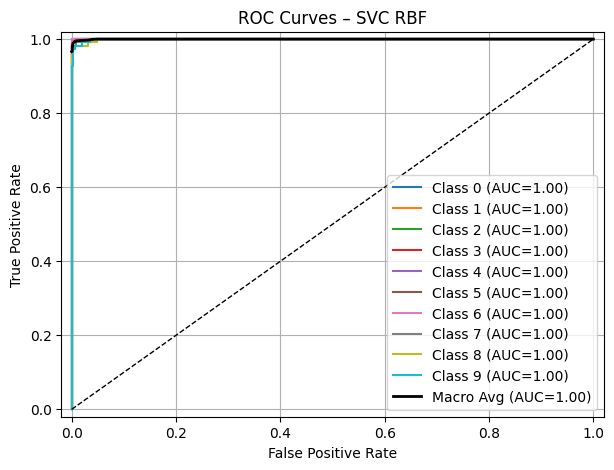

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_rbf = svc_rbf.predict_proba(X_test_scaled)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC RBF")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

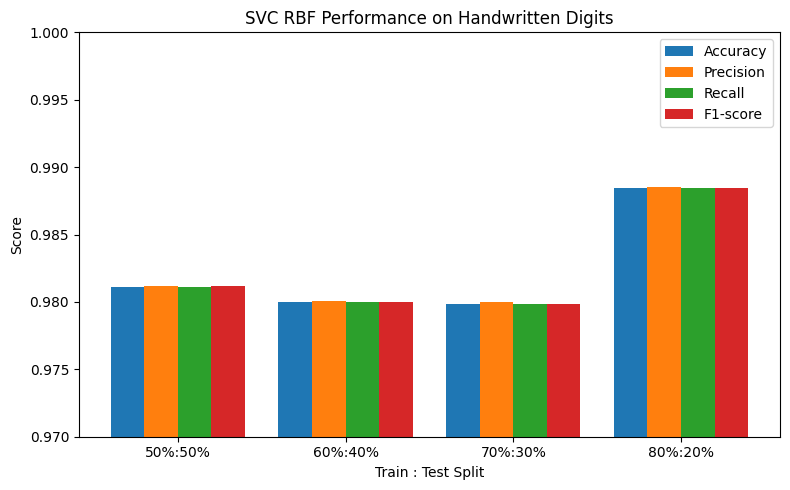

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.5, 0.4, 0.3, 0.2]  # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X, y, test_size=t, random_state=42
    )
    scaler_split = StandardScaler()
    X_train_scaled_split = scaler_split.fit_transform(X_train_split)
    X_test_scaled_split  = scaler_split.transform(X_test_split)

    svc_rbf_split = SVC(kernel='rbf', probability=True, random_state=42)
    svc_rbf_split.fit(X_train_scaled_split, y_train_split)
    y_pred_split = svc_rbf_split.predict(X_test_scaled_split)

    report = classification_report(y_test_split, y_pred_split, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x-1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x-0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x+0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x+1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.97, 1)
plt.xlabel("Train : Test Split")
plt.ylabel("Score")
plt.title("SVC RBF Performance on Handwritten Digits")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC RBF (PCA-reduced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      0.99      0.99       114
           2       1.00      0.99      1.00       111
           3       0.97      0.99      0.98       114
           4       0.97      1.00      0.98       114
           5       0.98      0.99      0.99       112
           6       0.99      0.99      0.99       112
           7       1.00      0.97      0.99       113
           8       1.00      0.97      0.99       111
           9       0.97      0.97      0.97       112

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



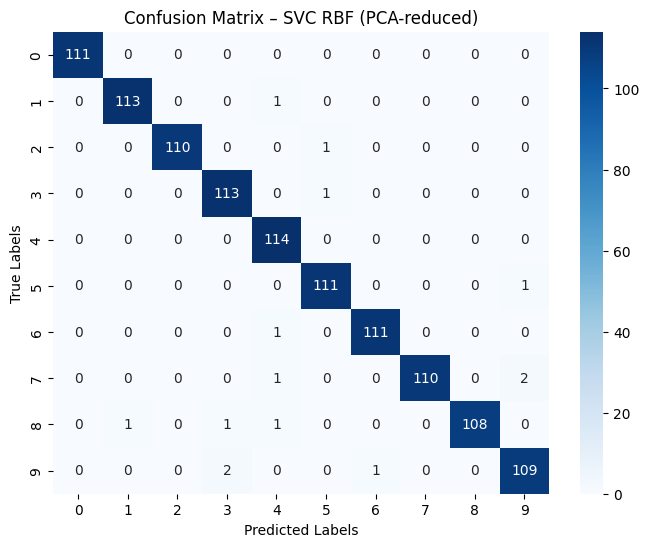

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Apply PCA ---
pca = PCA(n_components=50, random_state=42)  # reduce dimensions, e.g., 50 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- Train SVC RBF on PCA data ---
svc_rbf_pca = SVC(kernel='rbf', probability=True, random_state=42)
svc_rbf_pca.fit(X_train_pca, y_train)

# --- Predictions ---
y_pred_pca = svc_rbf_pca.predict(X_test_pca)

# --- Performance report ---
print("Performance Evaluation – SVC RBF (PCA-reduced):")
print(classification_report(y_test, y_pred_pca))

# --- Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC RBF (PCA-reduced)')
plt.show()


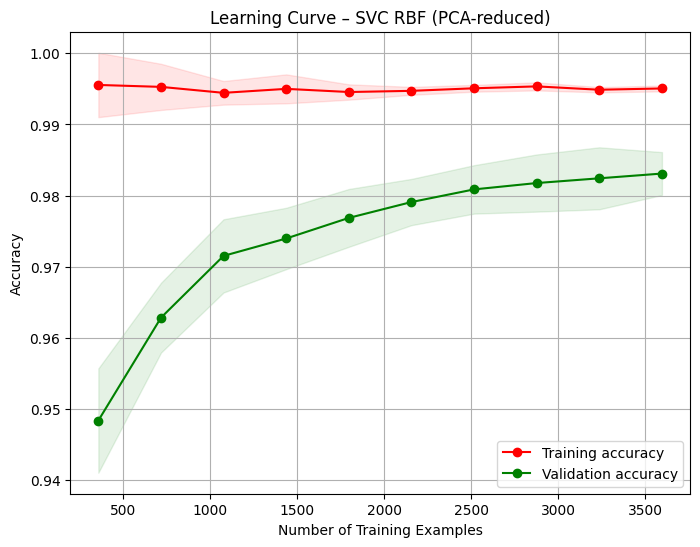

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline including PCA ---
pipe_rbf_pca = Pipeline([
    ('pca', PCA(n_components=50, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

# --- Compute learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_rbf_pca,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC RBF (PCA-reduced)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


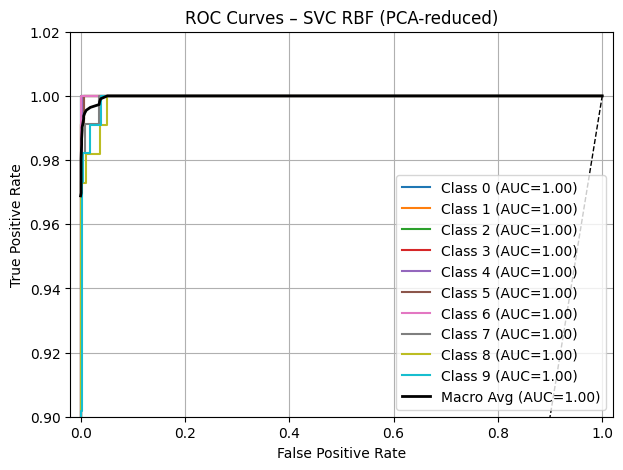

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities on PCA-reduced data ---
y_score_pca = svc_rbf_pca.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.9,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC RBF (PCA-reduced)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVC SIGMOID

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Sigmoid:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.88      0.86      0.87       114
           2       0.87      0.92      0.89       111
           3       0.97      0.97      0.97       114
           4       0.97      0.94      0.96       114
           5       0.95      0.92      0.94       112
           6       1.00      0.97      0.99       112
           7       0.93      0.96      0.94       113
           8       0.91      0.95      0.93       111
           9       0.95      0.95      0.95       112

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124



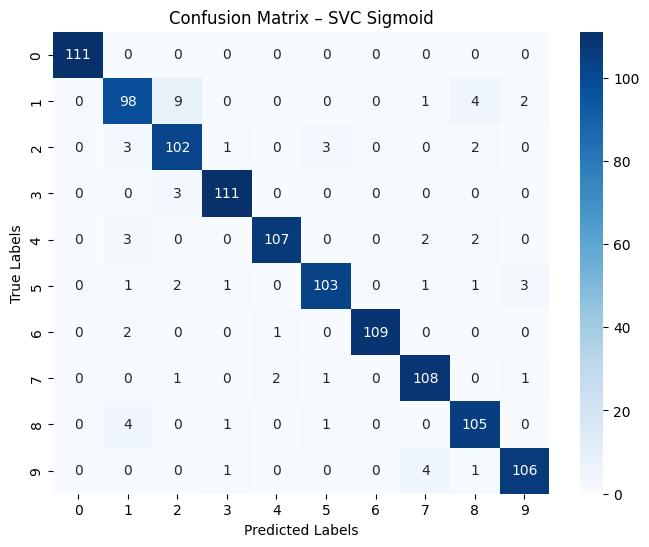

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train SVC Sigmoid ---
svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
svc_sigmoid.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_sigmoid = svc_sigmoid.predict(X_test_scaled)

# --- Performance report ---
print("Performance Evaluation – SVC Sigmoid:")
print(classification_report(y_test, y_pred_sigmoid))

# --- Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Sigmoid')
plt.show()


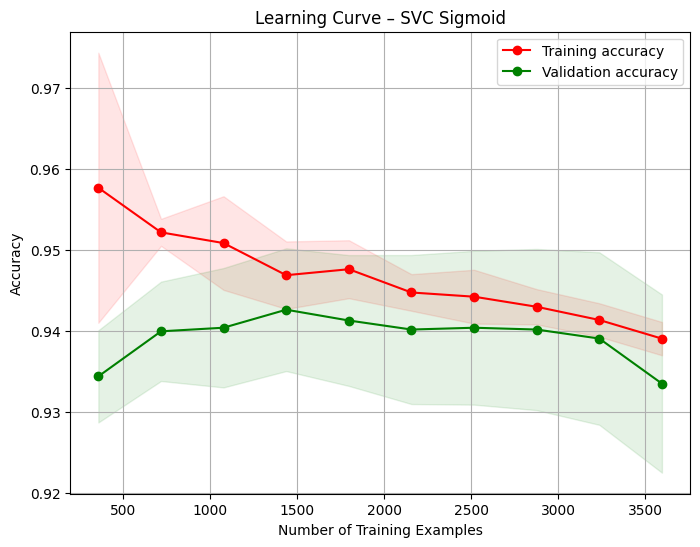

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline including scaling ---
pipe_sigmoid = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='sigmoid', probability=True, random_state=42))
])

# --- Compute learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_sigmoid,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Sigmoid")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


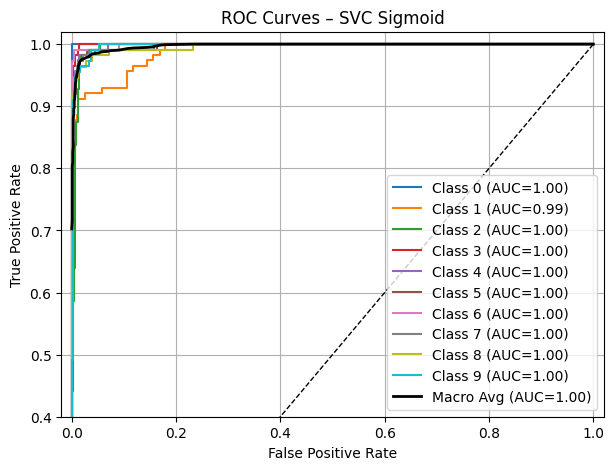

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_sigmoid = svc_sigmoid.predict_proba(X_test_scaled)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sigmoid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.4,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Sigmoid")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

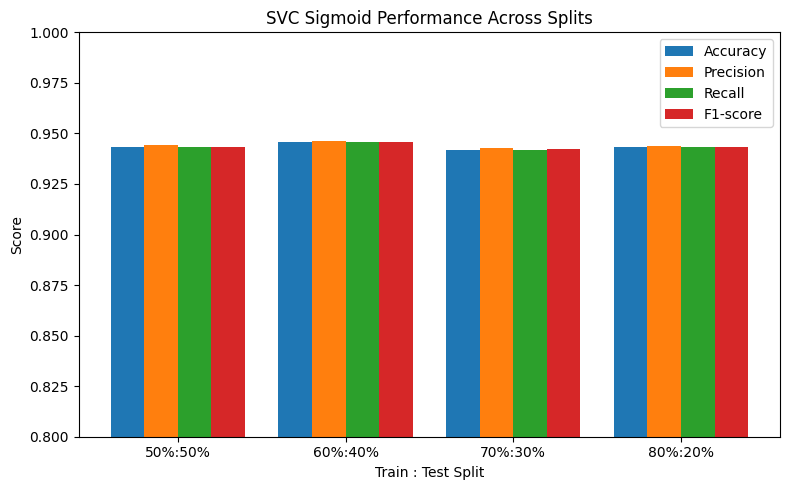

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

test_sizes = [0.5, 0.4, 0.3, 0.2]   # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    # split & scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=t, stratify=y, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # train & predict
    svc = SVC(kernel='sigmoid', probability=True, random_state=42)
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)

    # collect metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.8,1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("SVC Sigmoid Performance Across Splits")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – SVC Sigmoid (PCA-reduced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.87      0.87      0.87       114
           2       0.87      0.93      0.90       111
           3       0.95      0.98      0.97       114
           4       0.96      0.92      0.94       114
           5       0.94      0.91      0.93       112
           6       1.00      0.96      0.98       112
           7       0.94      0.95      0.94       113
           8       0.92      0.94      0.93       111
           9       0.93      0.92      0.92       112

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124



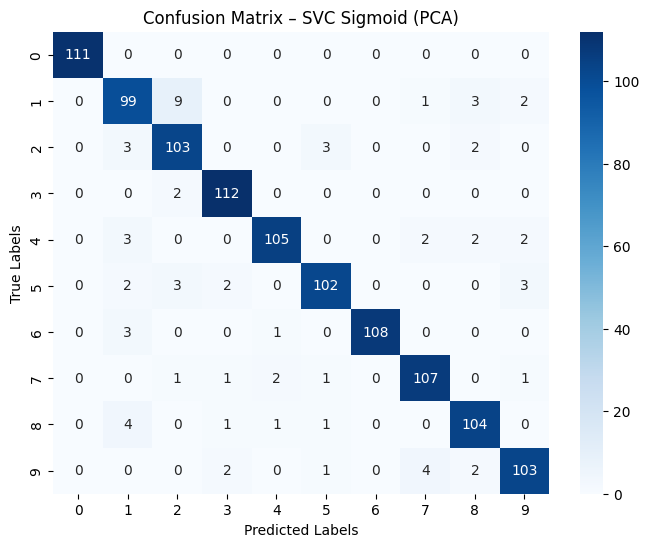

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Apply PCA ---
pca = PCA(n_components=50, random_state=42)  # choose components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- Train SVC Sigmoid ---
svc_sigmoid_pca = SVC(kernel='sigmoid', probability=True, random_state=42)
svc_sigmoid_pca.fit(X_train_pca, y_train)

# --- Predictions ---
y_pred_pca = svc_sigmoid_pca.predict(X_test_pca)

# --- Performance report ---
print("Performance Evaluation – SVC Sigmoid (PCA-reduced):")
print(classification_report(y_test, y_pred_pca))

# --- Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – SVC Sigmoid (PCA)')
plt.show()


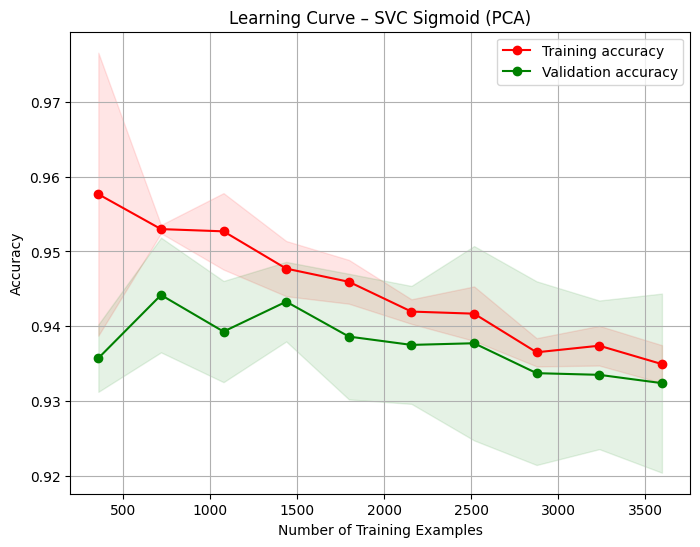

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline with PCA + SVC ---
pipe_sigmoid_pca = Pipeline([
    ('pca', PCA(n_components=50, random_state=42)),
    ('svc', SVC(kernel='sigmoid', probability=True, random_state=42))
])

# --- Compute learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_sigmoid_pca,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – SVC Sigmoid (PCA)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


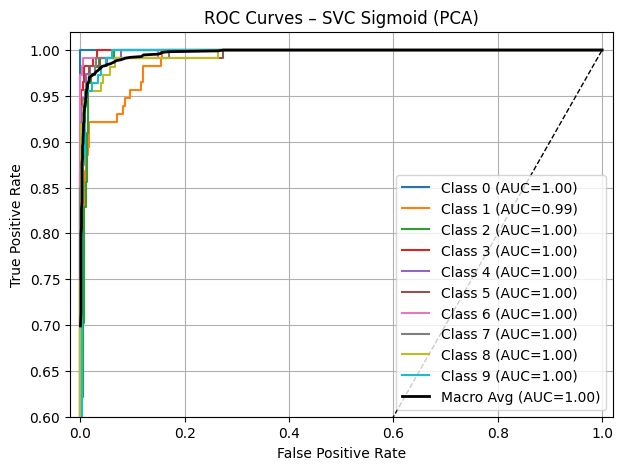

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_pca = svc_sigmoid_pca.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.6,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – SVC Sigmoid (PCA)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# MPL

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – MLP Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      0.98      0.99       114
           2       0.99      0.98      0.99       111
           3       0.97      0.99      0.98       114
           4       0.98      0.98      0.98       114
           5       0.97      0.97      0.97       112
           6       0.99      0.99      0.99       112
           7       0.98      0.98      0.98       113
           8       0.97      0.98      0.98       111
           9       0.97      0.96      0.97       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



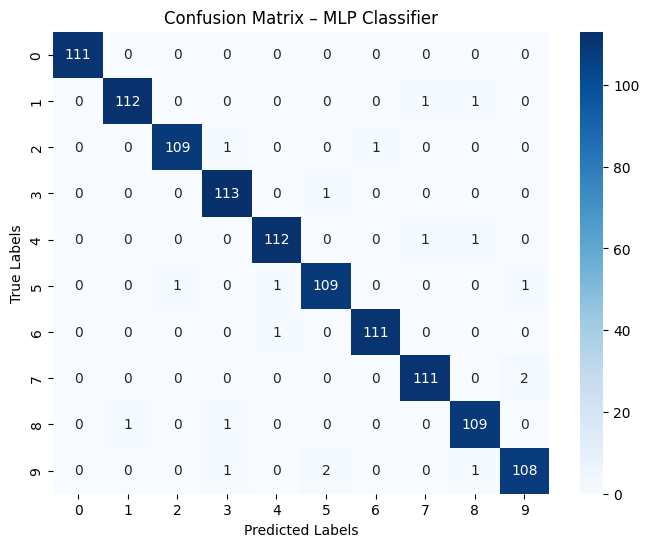

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Initialize MLP ---
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='sgd',   # using momentum
                    learning_rate_init=0.01,
                    momentum=0.9,
                    max_iter=200,   # epoch size
                    random_state=42)

# --- Train ---
mlp.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_mlp = mlp.predict(X_test_scaled)

# --- Performance report ---
print("Performance Evaluation – MLP Classifier:")
print(classification_report(y_test, y_pred_mlp))

# --- Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – MLP Classifier')
plt.show()


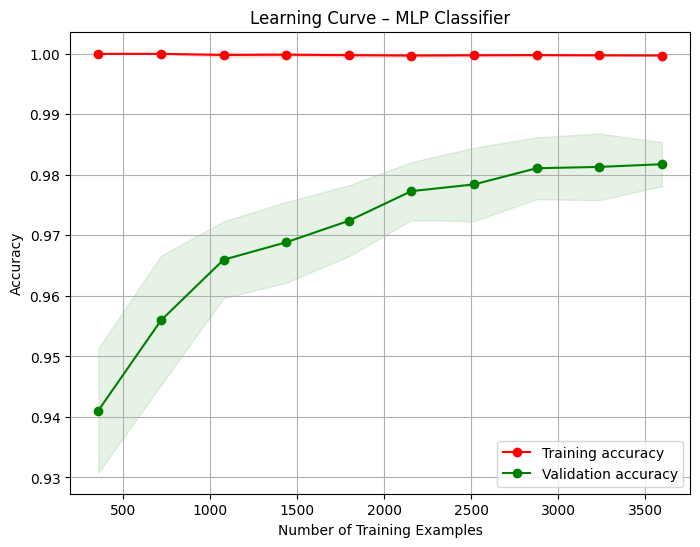

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline for scaling + MLP ---
pipe_mlp = Pipeline([
    ('mlp', mlp)   # already expects scaled input
])

# --- Compute learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_mlp,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot learning curve ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – MLP Classifier")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


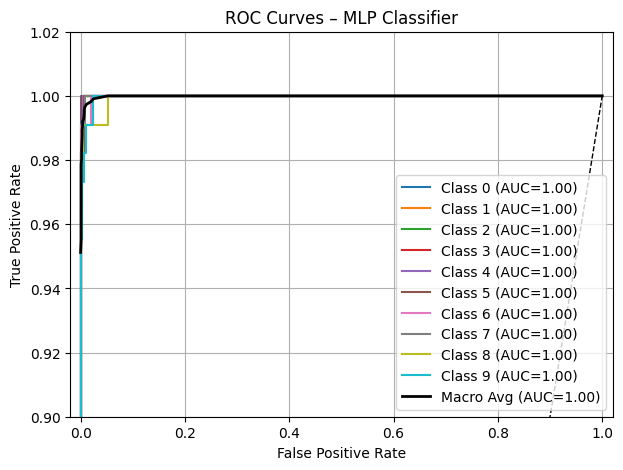

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels for multiclass ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_mlp = mlp.predict_proba(X_test_scaled)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.9,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – MLP Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

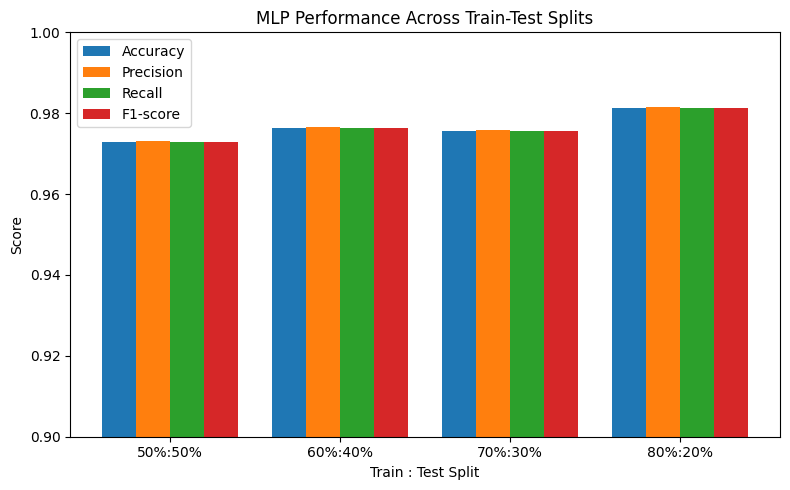

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.5, 0.4, 0.3, 0.2]   # 50:50, 60:40, 70:30, 80:20
metrics_per_split = []

for t in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=t, random_state=42)
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_te_scaled = scaler.transform(X_te)

    mlp_split = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                              solver='sgd', learning_rate_init=0.01, momentum=0.9,
                              max_iter=200, random_state=42)
    mlp_split.fit(X_tr_scaled, y_tr)
    y_pred_split = mlp_split.predict(X_te_scaled)

    report = classification_report(y_te, y_pred_split, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# --- Plot grouped bars ---
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1 - t):.0%}:{t:.0%}" for t in test_sizes]

bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")

plt.xticks(x, labels)
plt.ylim(0.9, 1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("MLP Performance Across Train-Test Splits")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation – MLP with PCA:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.98      0.99      0.99       114
           2       0.99      0.97      0.98       111
           3       0.97      0.99      0.98       114
           4       0.97      0.99      0.98       114
           5       0.96      0.98      0.97       112
           6       1.00      0.98      0.99       112
           7       0.99      0.99      0.99       113
           8       0.98      0.97      0.98       111
           9       0.98      0.96      0.97       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



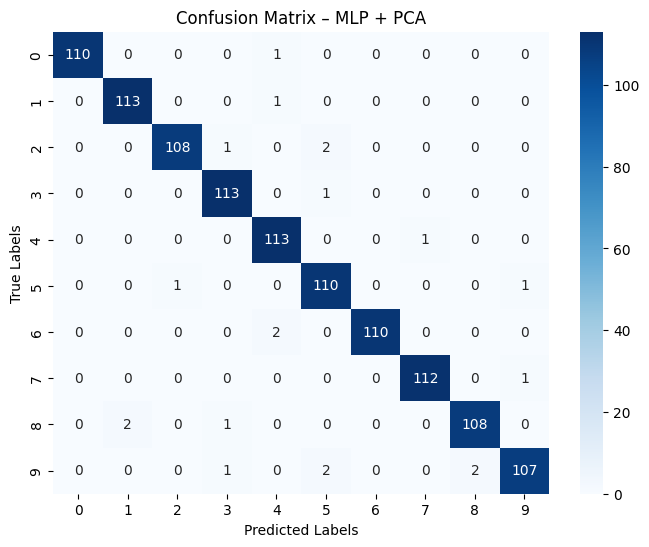

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Apply PCA ---
pca = PCA(n_components=50, random_state=42)  # choose components, e.g., 50
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# --- Train MLP ---
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                        solver='sgd', learning_rate_init=0.01, momentum=0.9,
                        max_iter=200, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# --- Predictions ---
y_pred_pca = mlp_pca.predict(X_test_pca)

# --- Performance report ---
print("Performance Evaluation – MLP with PCA:")
print(classification_report(y_test, y_pred_pca))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix – MLP + PCA')
plt.show()


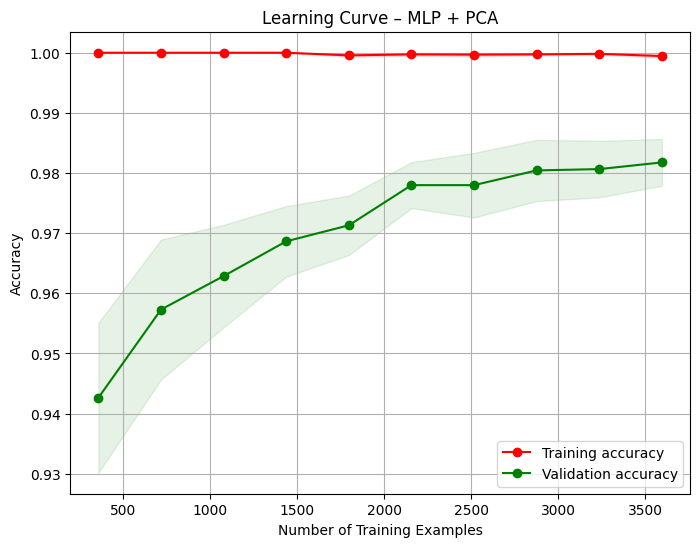

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np

# --- Pipeline (PCA already applied) ---
pipe_mlp_pca = Pipeline([
    ('mlp', mlp_pca)
])

# --- Compute learning curve ---
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_mlp_pca,
    X=X_train_pca,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Mean & std ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='g')
plt.title("Learning Curve – MLP + PCA")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


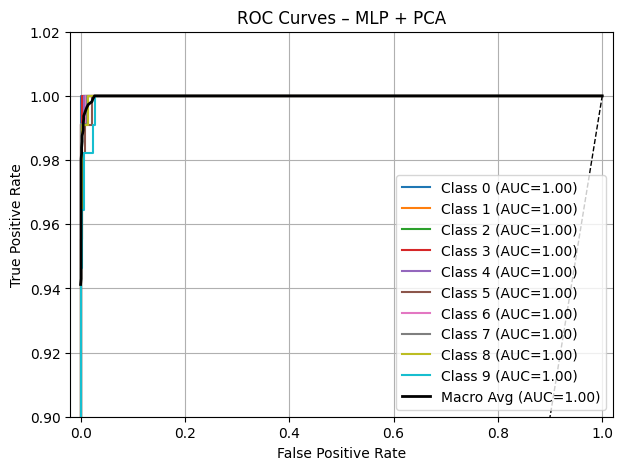

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Binarize labels for multiclass ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Predict probabilities ---
y_score_pca = mlp_pca.predict_proba(X_test_pca)

# --- Per-class ROC ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Macro-average ROC ---
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# --- Plot ROC ---
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC={roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.9,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – MLP + PCA")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# RANDOM FOREST

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.99      1.00      1.00       171
           2       0.99      1.00      1.00       167
           3       0.98      0.98      0.98       172
           4       0.99      0.99      0.99       171
           5       1.00      0.97      0.98       167
           6       0.99      0.99      0.99       167
           7       0.97      0.98      0.98       170
           8       0.96      0.98      0.97       166
           9       0.96      0.95      0.96       169

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686



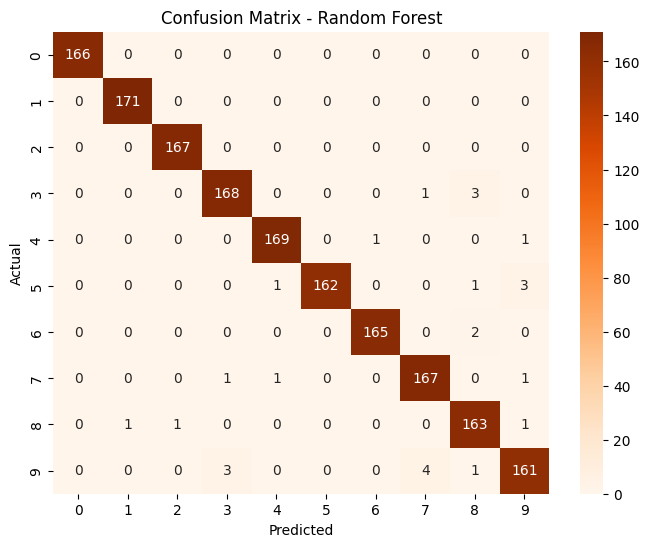

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Performance report
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


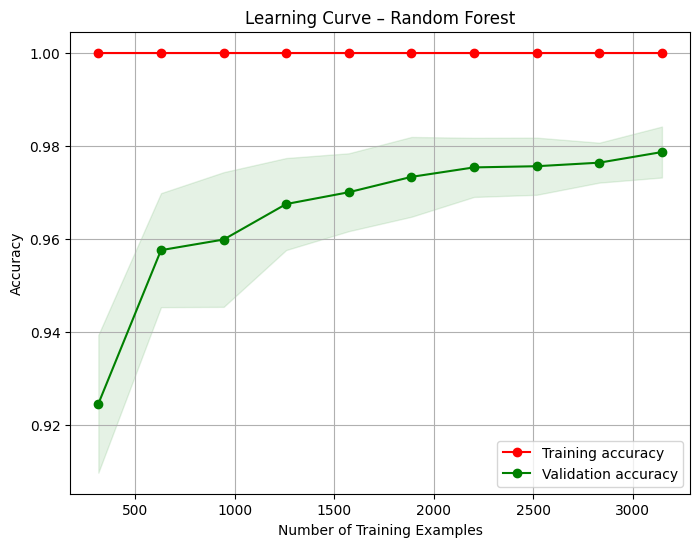

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf,
    X=X_train,         # original (or scaled) features
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean & std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.title("Learning Curve – Random Forest")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


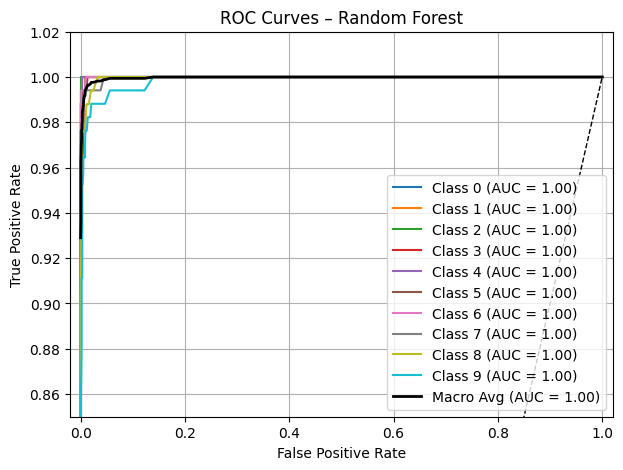

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predicted probabilities
y_score = rf.predict_proba(X_test)

# Per-class ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.85,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

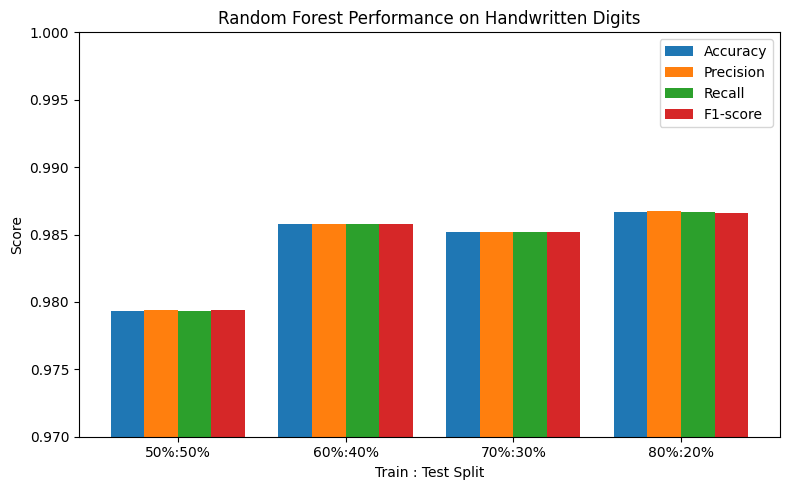

In [ ]:
import numpy as np

test_sizes = [0.5, 0.4, 0.3, 0.2]
metrics_per_split = []

for t in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=t, stratify=y, random_state=42
    )
    rf_split = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_split.fit(X_tr, y_tr)
    y_pred = rf_split.predict(X_te)
    report = classification_report(y_te, y_pred, output_dict=True)
    acc  = report["accuracy"]
    prec = report["weighted avg"]["precision"]
    rec  = report["weighted avg"]["recall"]
    f1   = report["weighted avg"]["f1-score"]
    metrics_per_split.append([acc, prec, rec, f1])

# Plot grouped bars
metrics_per_split = np.array(metrics_per_split)
labels = [f"{(1-t):.0%}:{t:.0%}" for t in test_sizes]
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 1.5*bar_width, metrics_per_split[:,0], width=bar_width, label="Accuracy")
plt.bar(x - 0.5*bar_width, metrics_per_split[:,1], width=bar_width, label="Precision")
plt.bar(x + 0.5*bar_width, metrics_per_split[:,2], width=bar_width, label="Recall")
plt.bar(x + 1.5*bar_width, metrics_per_split[:,3], width=bar_width, label="F1-score")
plt.xticks(x, labels)
plt.ylim(0.97,1)
plt.ylabel("Score")
plt.xlabel("Train : Test Split")
plt.title("Random Forest Performance on Handwritten Digits")
plt.legend()
plt.tight_layout()
plt.show()


# AFTER PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Apply PCA (choose n_components, e.g., 50)
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Performance after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.99      0.99      0.99       171
           2       0.99      0.99      0.99       167
           3       0.97      0.97      0.97       172
           4       0.97      0.97      0.97       171
           5       0.98      0.93      0.96       167
           6       0.99      0.99      0.99       167
           7       0.95      0.97      0.96       170
           8       0.93      0.95      0.94       166
           9       0.94      0.95      0.94       169

    accuracy                           0.97      1686
   macro avg       0.97      0.97      0.97      1686
weighted avg       0.97      0.97      0.97      1686



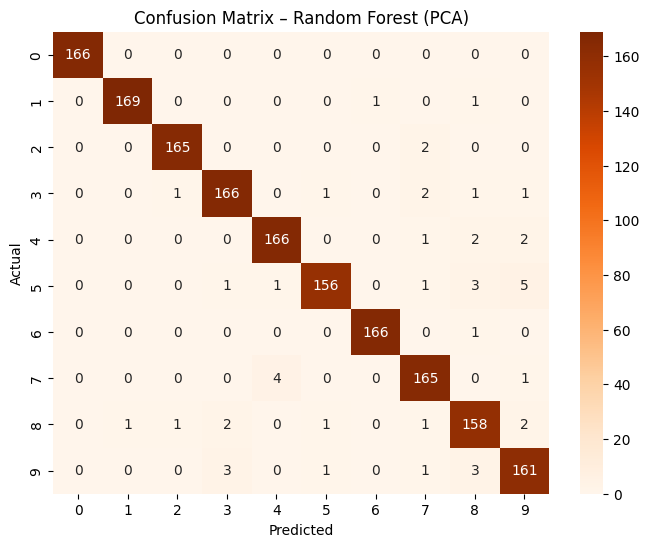

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = rf_pca.predict(X_test_pca)

# Performance report
print("Random Forest Performance after PCA:")
print(classification_report(y_test, y_pred_pca))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest (PCA)")
plt.show()


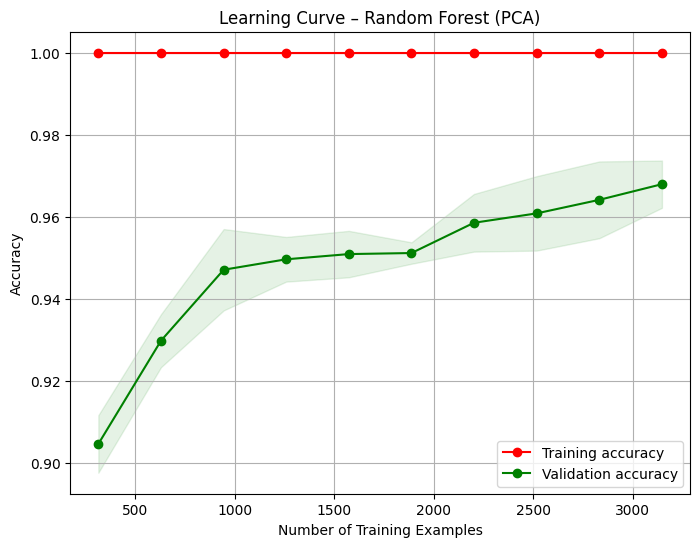

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_pca,
    X=X_train_pca,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Mean & std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean,  'o-', color='g', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.title("Learning Curve – Random Forest (PCA)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


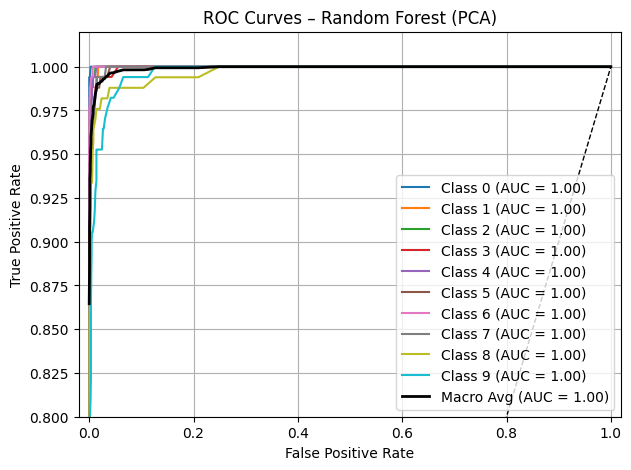

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predicted probabilities
y_score = rf_pca.predict_proba(X_test_pca)

# Per-class ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot
plt.figure(figsize=(7,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, label=f"Macro Avg (AUC = {roc_auc_macro:.2f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([-0.02,1.02])
plt.ylim([0.8,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest (PCA)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
